# **Santander Product Recommendation**

https://www.kaggle.com/competitions/santander-product-recommendation/data?select=train_ver2.csv.zip

This project is posted by Santander Bank. They provide loans for down payments on houses, leverage the equity in home, help with financial decisions, and offer help in recommending personalized products.

This particular project is to help predict which product their existing customers will use in the next month based on their past behavior and that of similar customers. 

The data is 1.5 years of customer behavior data from standard banks to predict what new product customers will purchase. The data starts 01-28-2015 and ends 06-28-2016, we are supposed to predict what they will purchase in the next month based on the data given. 

The data size is 240.06 MB for 3 csv files. There are 48 columns and around 13 million rows.  The columns are information based on the customers, such as age, demographic and income.

This is a supervised classification that is a multiclass problem.

# **Data Loading and Initial Look**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
rec = pd.read_csv('final_train.csv')
rec

/tmp/ipykernel_19835/2590028012.py:1: DtypeWarning: Columns (10,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  rec = pd.read_csv('final_train.csv')


,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2016-02-28,989076,N,ES,H,24,2011-12-02,0.0,50,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-06-28,955948,N,ES,H,24,2011-10-06,0.0,45,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-08-28,1231387,N,ES,H,21,2013-12-13,0.0,20,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-04-28,1027719,N,ES,V,26,2012-07-20,0.0,36,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2016-05-28,449863,N,ES,V,68,2003-12-22,0.0,149,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2015-09-28,316351,N,ES,V,55,2002-01-21,0.0,164,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
999996,2016-03-28,523807,N,ES,V,47,2005-03-18,1.0,4,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
999997,2016-05-28,305431,N,ES,H,47,2001-12-07,0.0,173,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
999998,2015-12-28,402302,N,ES,V,71,2003-01-20,0.0,155,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [3]:
rec.columns

Index(['fecha_dato', 'ncodpers', 'ind_empleado', 'pais_residencia', 'sexo',
       'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel',
       'ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext',
       'conyuemp', 'canal_entrada', 'indfall', 'tipodom', 'cod_prov',
       'nomprov', 'ind_actividad_cliente', 'renta', 'segmento',
       'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1'],
      dtype='object')

In [4]:
print(rec.dtypes)

fecha_dato                object
ncodpers                   int64
ind_empleado              object
pais_residencia           object
sexo                      object
age                       object
fecha_alta                object
ind_nuevo                float64
antiguedad                object
indrel                   float64
ult_fec_cli_1t            object
indrel_1mes               object
tiprel_1mes               object
indresi                   object
indext                    object
conyuemp                  object
canal_entrada             object
indfall                   object
tipodom                  float64
cod_prov                 float64
nomprov                   object
ind_actividad_cliente    float64
renta                    float64
segmento                  object
ind_ahor_fin_ult1          int64
ind_aval_fin_ult1          int64
ind_cco_fin_ult1           int64
ind_cder_fin_ult1          int64
ind_cno_fin_ult1           int64
ind_ctju_fin_ult1          int64
ind_ctma_f

In [5]:
dataset_size=rec.shape
print("Dataset Size:", dataset_size)

Dataset Size: (1000000, 48)


In [6]:
missing_value=rec.isnull().sum()
print("Missing Data: \n", missing_value)

Missing Data: 
 fecha_dato                    0
ncodpers                      0
ind_empleado               2099
pais_residencia            2099
sexo                       2104
age                           0
fecha_alta                 2099
ind_nuevo                  2099
antiguedad                    0
indrel                     2099
ult_fec_cli_1t           998122
indrel_1mes               11195
tiprel_1mes               11195
indresi                    2099
indext                     2099
conyuemp                 999867
canal_entrada             13833
indfall                    2099
tipodom                    2100
cod_prov                   6887
nomprov                    6887
ind_actividad_cliente      2099
renta                    204605
segmento                  14066
ind_ahor_fin_ult1             0
ind_aval_fin_ult1             0
ind_cco_fin_ult1              0
ind_cder_fin_ult1             0
ind_cno_fin_ult1              0
ind_ctju_fin_ult1             0
ind_ctma_fin_ult1       

# **Data Cleaning**

In [7]:
for i in rec.columns:
    print(f"{i}\n", rec[i].unique(), "\n", f"Values = {rec[i].unique().size}\n")

fecha_dato
 ['2016-02-28' '2015-06-28' '2015-08-28' '2015-04-28' '2016-05-28'
 '2015-02-28' '2015-12-28' '2015-07-28' '2016-01-28' '2015-10-28'
 '2015-03-28' '2016-04-28' '2015-09-28' '2016-03-28' '2015-11-28'
 '2015-05-28' '2015-01-28'] 
 Values = 17

ncodpers
 [ 989076  955948 1231387 ... 1364530  523807  305431] 
 Values = 616046

ind_empleado
 ['N' nan 'A' 'B' 'F'] 
 Values = 5

pais_residencia
 ['ES' nan 'DE' 'FR' 'RO' 'EE' 'BR' 'PT' 'LU' 'HN' 'VE' 'KE' 'US' 'PL' 'MA'
 'MX' 'AR' 'PE' 'SE' 'GB' 'CU' 'BY' 'PR' 'NG' 'UY' 'NI' 'FI' 'IT' 'EC'
 'RU' 'DO' 'CH' 'UA' 'CO' 'AU' 'BE' 'GQ' 'BO' 'IN' 'GN' 'IE' 'CN' 'NL'
 'CZ' 'PY' 'VN' 'ZA' 'MM' 'MK' 'SV' 'GT' 'AT' 'JP' 'CL' 'EG' 'AD' 'CR'
 'AE' 'HR' 'BG' 'IL' 'CA' 'DZ' 'PA' 'OM' 'TH' 'MD' 'DK' 'DJ' 'MR' 'GW'
 'KR' 'GR' 'SG' 'LY' 'AO' 'SK' 'SA' 'GA' 'NO' 'PK' 'CM' 'CD' 'QA' 'CI'
 'PH' 'CG' 'SN' 'SL' 'GE' 'IS' 'BM' 'LB' 'MZ' 'LT' 'TW' 'KZ' 'GH' 'GI'
 'KH' 'ML' 'HK' 'TR' 'TN' 'BA' 'TG' 'LV' 'ET' 'KW'] 
 Values = 109

sexo
 ['H' 'V' nan] 
 Values

In [8]:
rec["fecha_dato"]=pd.to_datetime(rec["fecha_dato"])

In [9]:
print (rec["fecha_dato"].dtype)

datetime64[ns]


In [10]:
rec["fecha_alta"]=pd.to_datetime(rec["fecha_alta"])

In [11]:
print(rec["fecha_alta"].dtype)

datetime64[ns]


In [12]:
rec["ult_fec_cli_1t"]=pd.to_datetime(rec["ult_fec_cli_1t"])

In [13]:
print(rec["ult_fec_cli_1t"].dtype)

datetime64[ns]


In [14]:
print(rec['age'])

0          24
1          24
2          21
3          26
4          68
         ... 
999995     55
999996     47
999997     47
999998     71
999999     51
Name: age, Length: 1000000, dtype: object


In [15]:
rec["age"]=pd.to_numeric(rec["age"], errors="coerce")

In [16]:
print(rec['age'])

0         24.0
1         24.0
2         21.0
3         26.0
4         68.0
          ... 
999995    55.0
999996    47.0
999997    47.0
999998    71.0
999999    51.0
Name: age, Length: 1000000, dtype: float64


In [17]:
median_age=rec['age'][rec['age']>=0].median()
rec.loc[rec['age']<0,'age']=median_age

In [18]:
negative_age_entries = rec[rec['age'] < 0]
if not negative_age_entries.empty:
    print("Negative entries found in the age column:")
    print(negative_age_entries)
else:
    print("No negative entries found in the age column.")

No negative entries found in the age column.


In [19]:
valid_values = ['1', '2', '3', '4']
def clean_value(x):
    if isinstance(x, str):
        x = x.rstrip('.0')
    return x if str(x) in valid_values else pd.NA

rec['indrel_1mes'] = rec['indrel_1mes'].apply(clean_value)

In [20]:
unique_values = rec['indrel_1mes'].unique()
print(unique_values)

[<NA> '1' '3' '2' '4']


In [21]:
value_counts = rec['antiguedad'].value_counts()
print(value_counts)

antiguedad
     12    17742
     21    15850
     10    14911
     23    13009
      9    12938
           ...  
    253       27
    254       26
    255       13
    256        4
-999999        4
Name: count, Length: 259, dtype: int64


In [22]:
value_counts = rec['renta'].value_counts()
print(value_counts)

renta
451931.22    384
463625.16    129
105260.88    102
128318.52     95
181042.20     94
            ... 
121883.04      1
188462.13      1
171506.55      1
79575.33       1
147042.63      1
Name: count, Length: 380687, dtype: int64


In [23]:
invalid_entries=rec[rec.select_dtypes(include=['number'])<0].count()

print("Invalid Entries:\n", invalid_entries)

Invalid Entries:
 fecha_dato               0
ncodpers                 0
ind_empleado             0
pais_residencia          0
sexo                     0
age                      0
fecha_alta               0
ind_nuevo                0
antiguedad               0
indrel                   0
ult_fec_cli_1t           0
indrel_1mes              0
tiprel_1mes              0
indresi                  0
indext                   0
conyuemp                 0
canal_entrada            0
indfall                  0
tipodom                  0
cod_prov                 0
nomprov                  0
ind_actividad_cliente    0
renta                    0
segmento                 0
ind_ahor_fin_ult1        0
ind_aval_fin_ult1        0
ind_cco_fin_ult1         0
ind_cder_fin_ult1        0
ind_cno_fin_ult1         0
ind_ctju_fin_ult1        0
ind_ctma_fin_ult1        0
ind_ctop_fin_ult1        0
ind_ctpp_fin_ult1        0
ind_deco_fin_ult1        0
ind_deme_fin_ult1        0
ind_dela_fin_ult1        0
ind_ecue_f

In [24]:
rec.describe()

,fecha_dato,ncodpers,age,fecha_alta,ind_nuevo,indrel,ult_fec_cli_1t,tipodom,cod_prov,ind_actividad_cliente,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
count,1000000,1.000000e+06,997901.000000,997901,997901.000000,997901.000000,1878,997900.0,993113.000000,997901.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,998772.000000,998772.000000,1000000.000000
mean,2015-10-19 23:27:18.892800512,8.349378e+05,40.162835,2009-02-09 10:51:45.852785152,0.059400,1.184431,2015-11-20 16:36:02.300319232,1.0,26.612304,0.457585,...,0.005871,0.009172,0.002666,0.052690,0.044283,0.025841,0.003829,0.054513,0.059144,0.127940
min,2015-01-28 00:00:00,1.588900e+04,2.000000,1995-01-16 00:00:00,0.000000,1.000000,2015-07-01 00:00:00,1.0,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015-06-28 00:00:00,4.528310e+05,24.000000,2004-04-23 00:00:00,0.000000,1.000000,2015-08-05 00:00:00,1.0,15.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2015-10-28 00:00:00,9.319820e+05,39.000000,2011-09-02 00:00:00,0.000000,1.000000,2015-11-20 00:00:00,1.0,28.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2016-02-28 00:00:00,1.199102e+06,50.000000,2013-10-18 00:00:00,0.000000,1.000000,2016-02-12 00:00:00,1.0,35.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2016-05-28 00:00:00,1.553685e+06,164.000000,2016-05-31 00:00:00,1.000000,99.000000,2016-05-30 00:00:00,1.0,52.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,NaN,4.313785e+05,17.164971,NaN,0.236371,4.247382,NaN,0.0,12.786326,0.498198,...,0.076397,0.095330,0.051564,0.223414,0.205723,0.158661,0.061760,0.227027,0.235893,0.334023


In [25]:
missing_data=rec.isnull().sum()
print("Missing data: \n",missing_data)

Missing data: 
 fecha_dato                    0
ncodpers                      0
ind_empleado               2099
pais_residencia            2099
sexo                       2104
age                        2099
fecha_alta                 2099
ind_nuevo                  2099
antiguedad                    0
indrel                     2099
ult_fec_cli_1t           998122
indrel_1mes              254792
tiprel_1mes               11195
indresi                    2099
indext                     2099
conyuemp                 999867
canal_entrada             13833
indfall                    2099
tipodom                    2100
cod_prov                   6887
nomprov                    6887
ind_actividad_cliente      2099
renta                    204605
segmento                  14066
ind_ahor_fin_ult1             0
ind_aval_fin_ult1             0
ind_cco_fin_ult1              0
ind_cder_fin_ult1             0
ind_cno_fin_ult1              0
ind_ctju_fin_ult1             0
ind_ctma_fin_ult1       

In [26]:
missing = ['fecha_dato', 'ncodpers', 'ind_empleado', 'pais_residencia', 'sexo',
           'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel',
           'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext',
           'canal_entrada', 'indfall', 'cod_prov',
           'nomprov', 'ind_actividad_cliente', 'segmento']
 
rec = rec.dropna(subset=missing)
rec = rec.dropna(subset=['ind_nomina_ult1','ind_nom_pens_ult1','renta'])

In [27]:
missing_data=rec.isnull().sum()
print("Missing:\n", missing_data)

Missing:
 fecha_dato                    0
ncodpers                      0
ind_empleado                  0
pais_residencia               0
sexo                          0
age                           0
fecha_alta                    0
ind_nuevo                     0
antiguedad                    0
indrel                        0
ult_fec_cli_1t           595943
indrel_1mes                   0
tiprel_1mes                   0
indresi                       0
indext                        0
conyuemp                 596277
canal_entrada                 0
indfall                       0
tipodom                       0
cod_prov                      0
nomprov                       0
ind_actividad_cliente         0
renta                         0
segmento                      0
ind_ahor_fin_ult1             0
ind_aval_fin_ult1             0
ind_cco_fin_ult1              0
ind_cder_fin_ult1             0
ind_cno_fin_ult1              0
ind_ctju_fin_ult1             0
ind_ctma_fin_ult1             

In [28]:
rec.shape

(596356, 48)

In [29]:
rec = rec.drop('ult_fec_cli_1t', axis=1)
rec = rec.drop('conyuemp', axis=1)

In [30]:
rec.shape

(596356, 46)

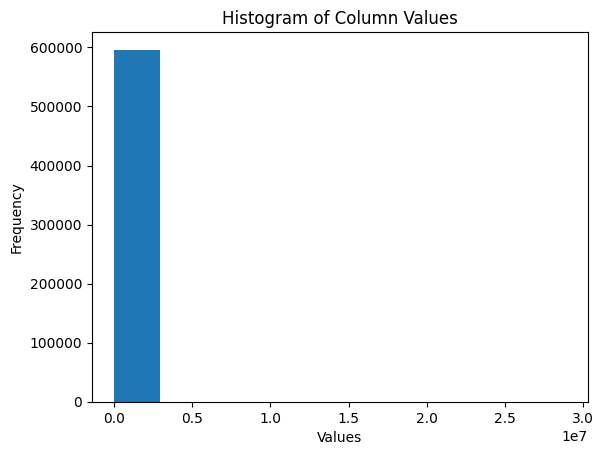

In [31]:
plt.hist(rec['renta'], bins=10)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Column Values')
plt.show()

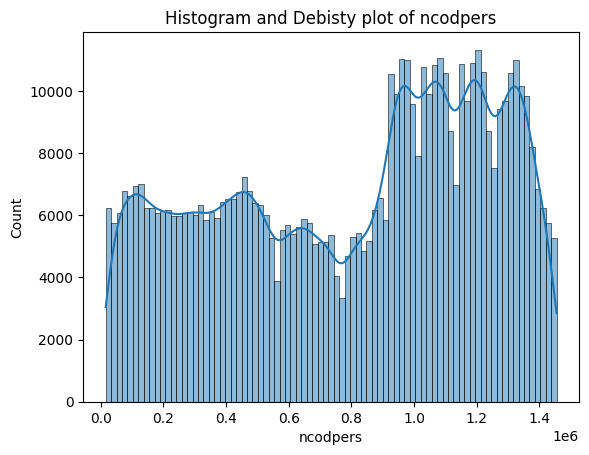

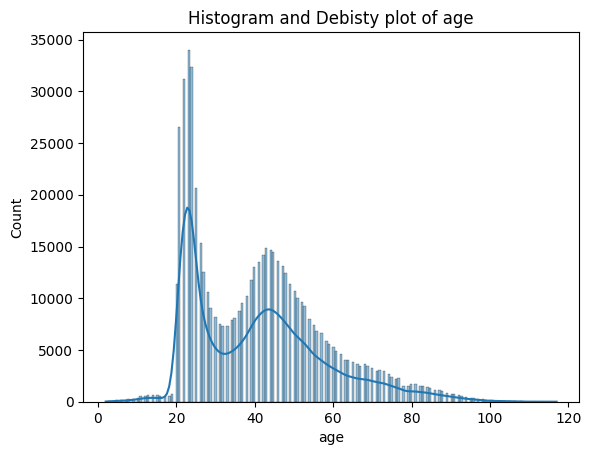

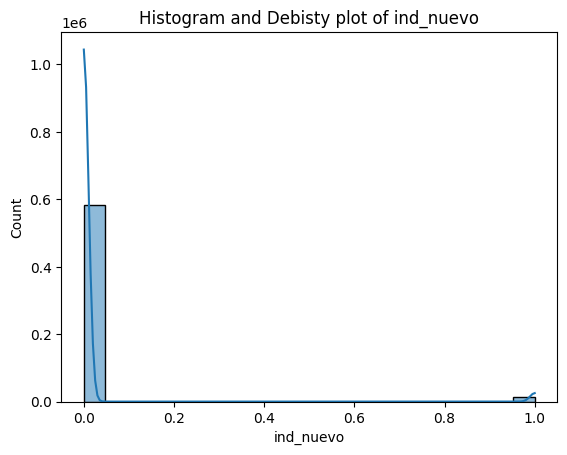

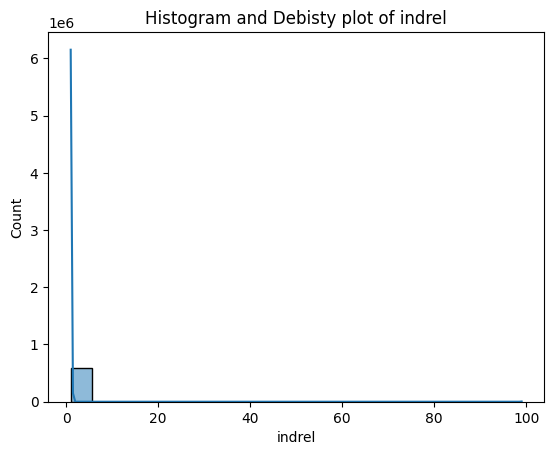

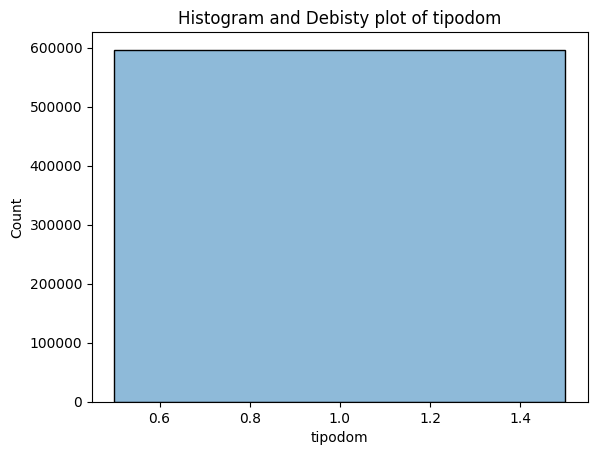

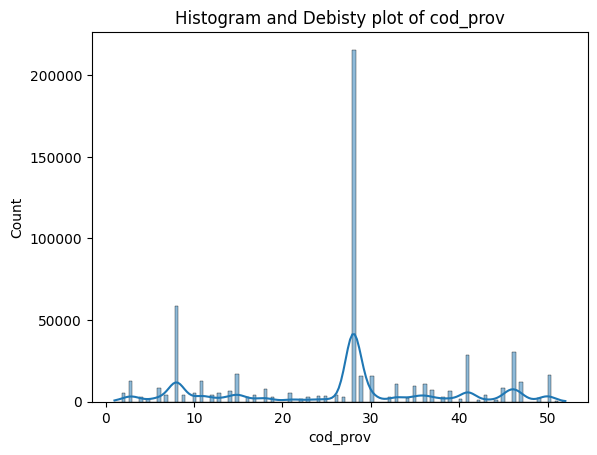

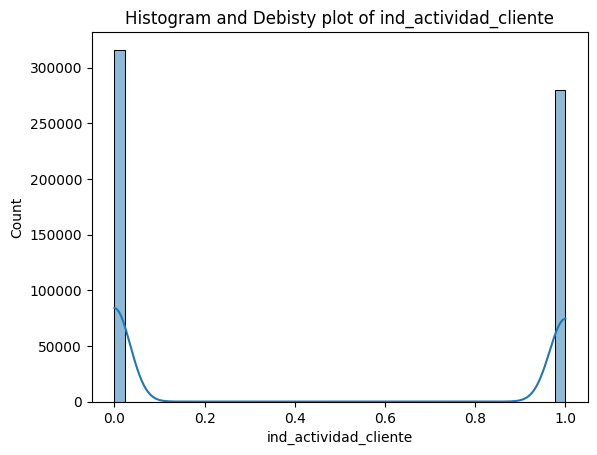

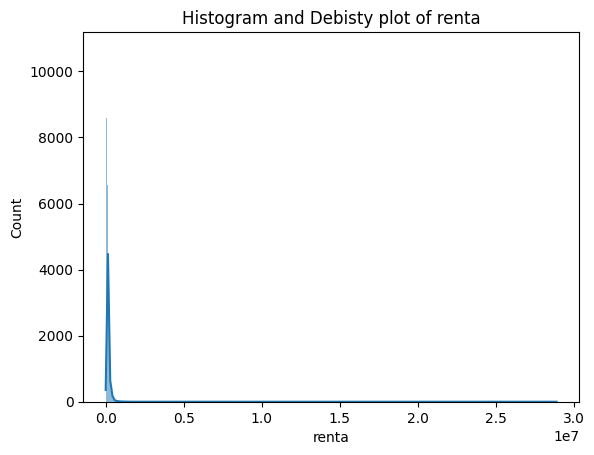

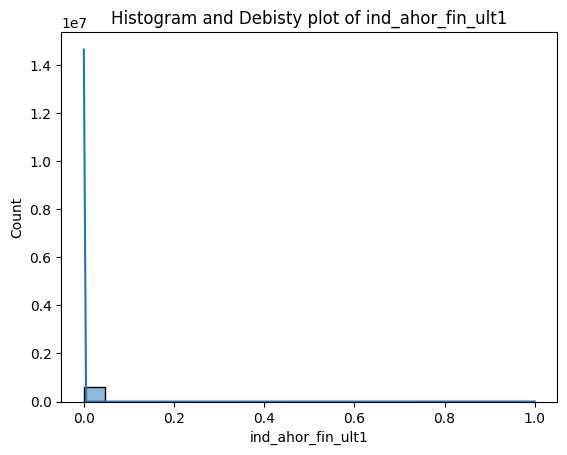

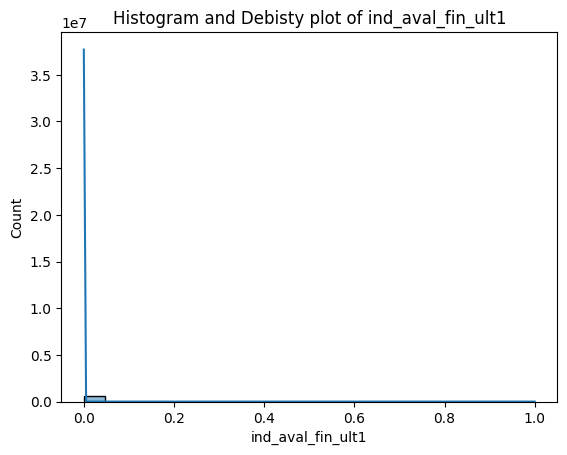

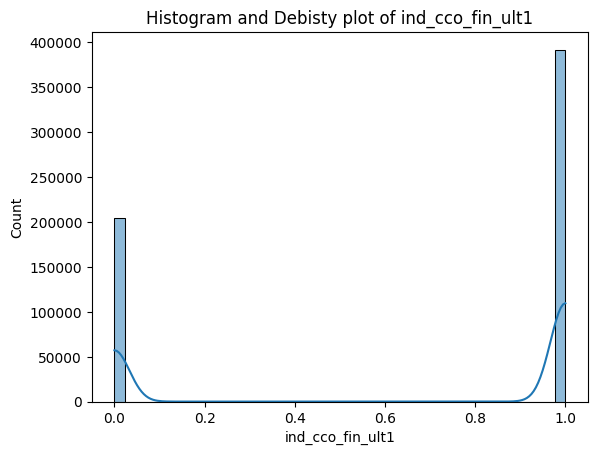

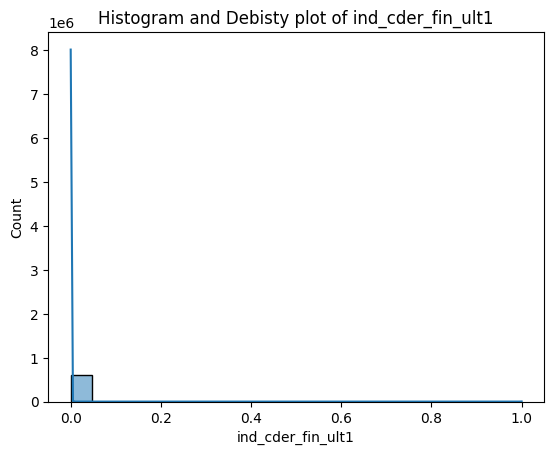

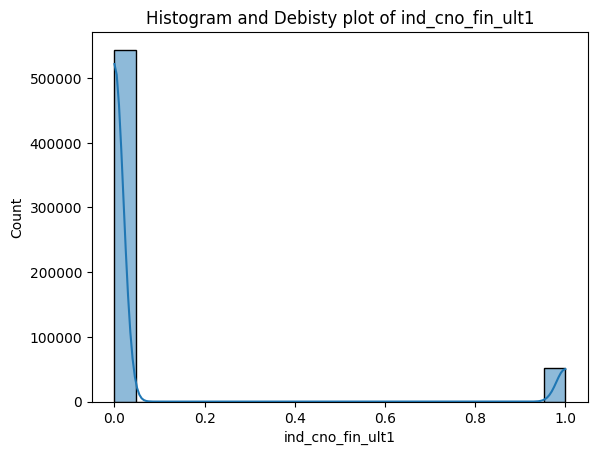

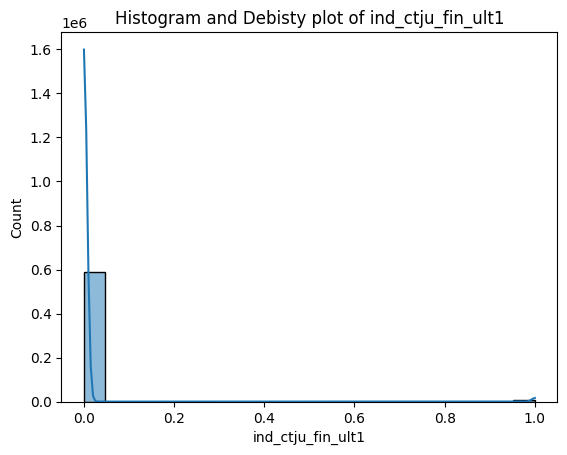

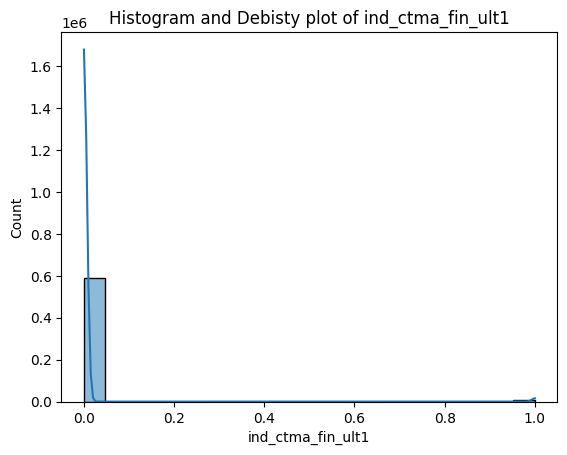

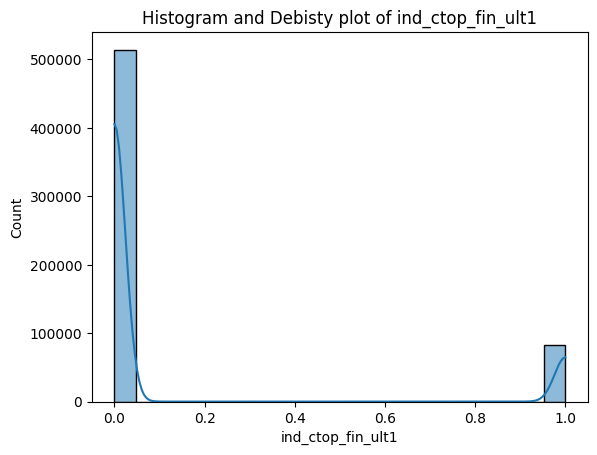

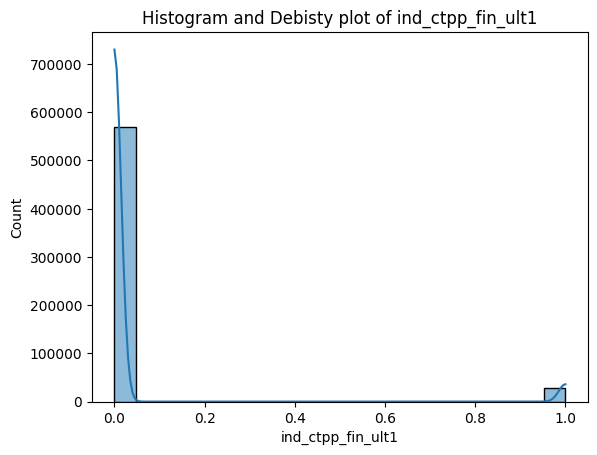

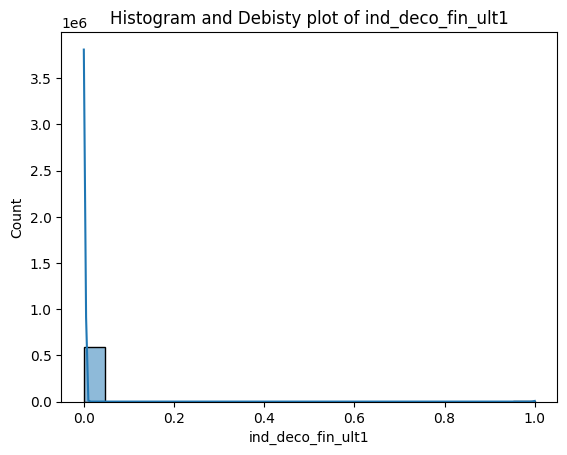

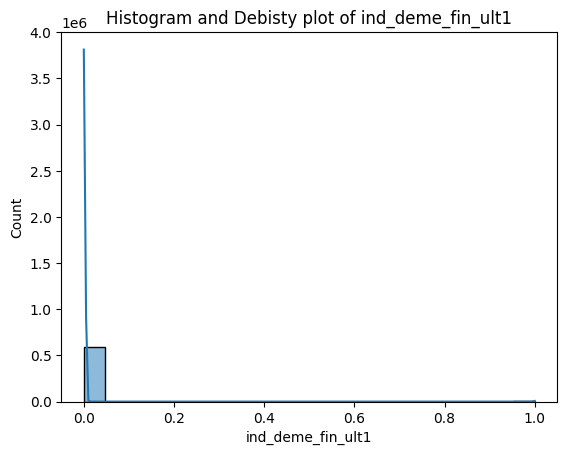

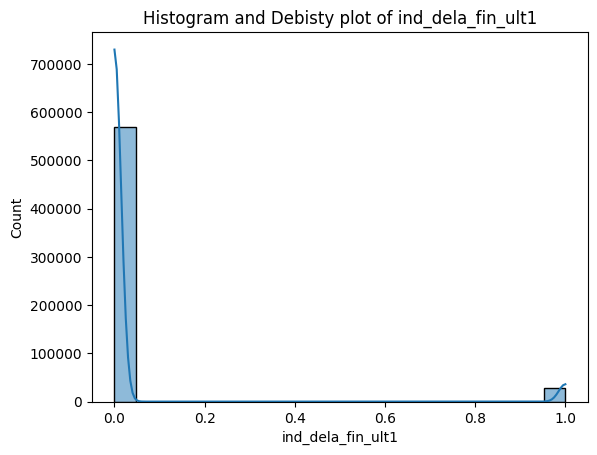

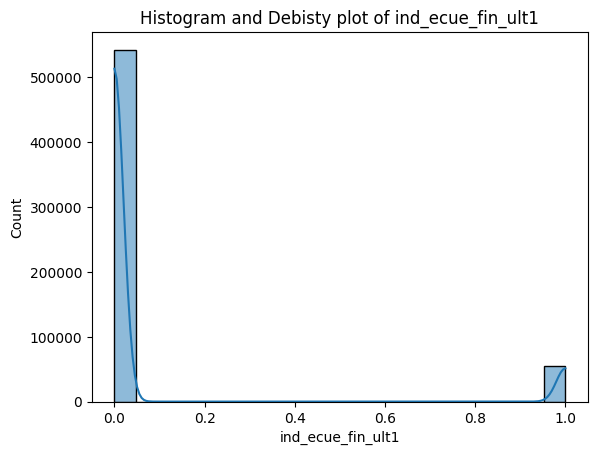

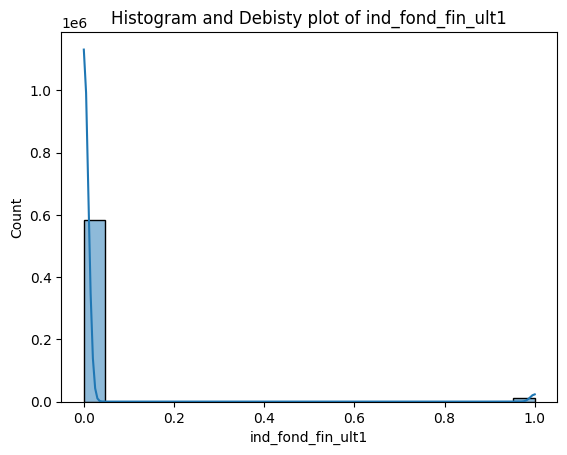

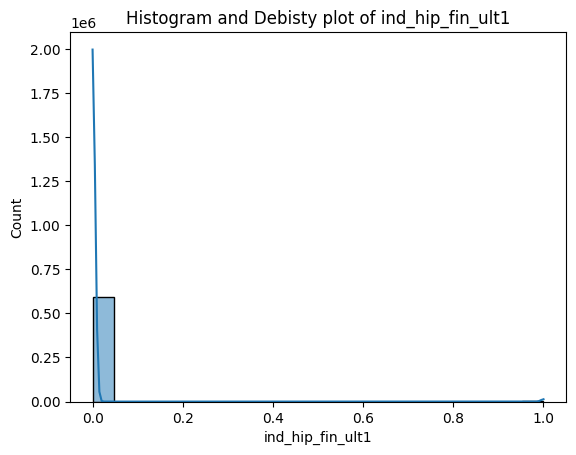

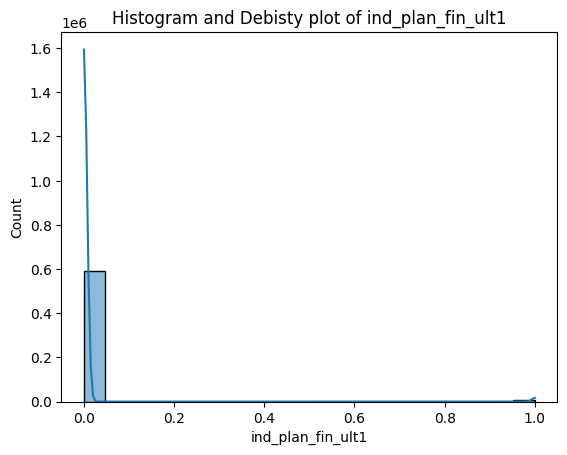

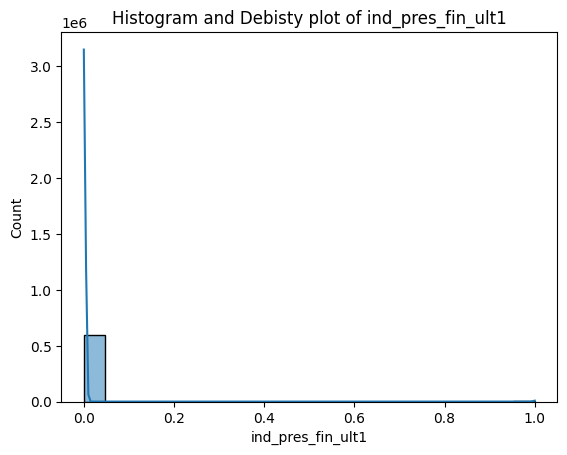

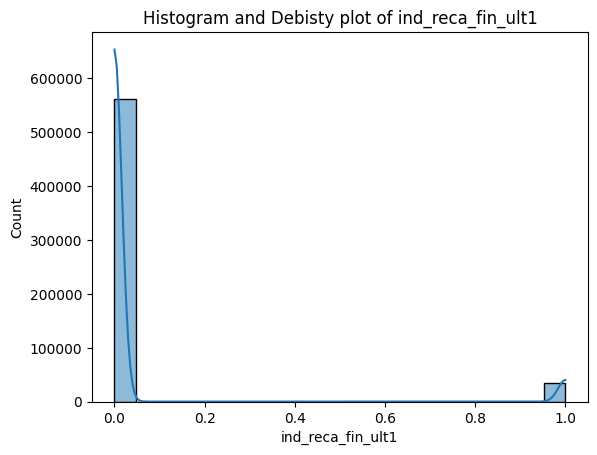

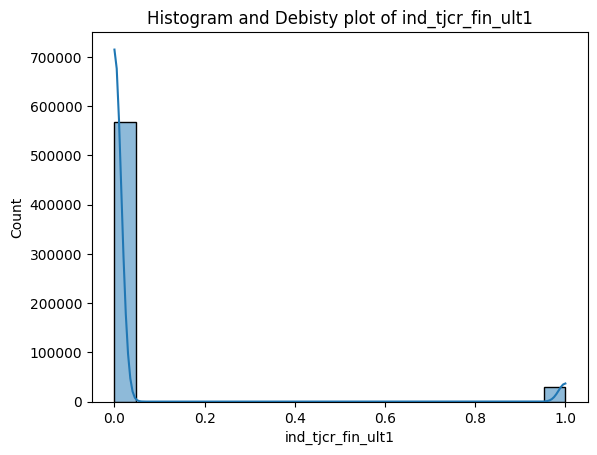

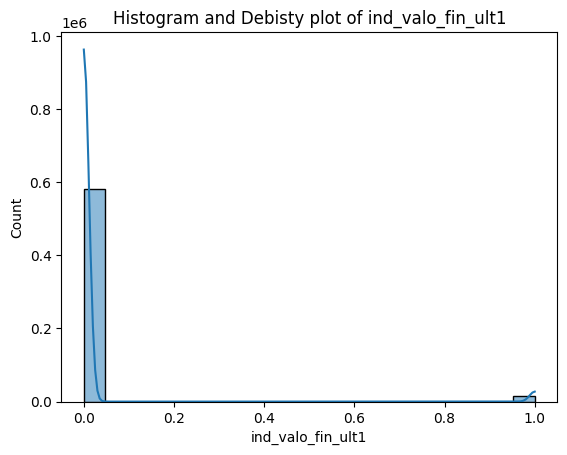

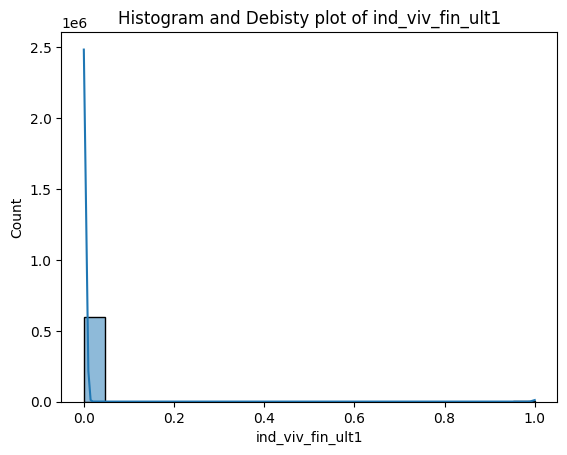

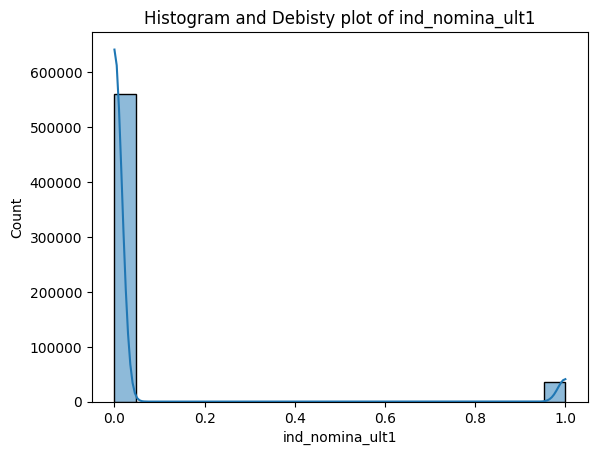

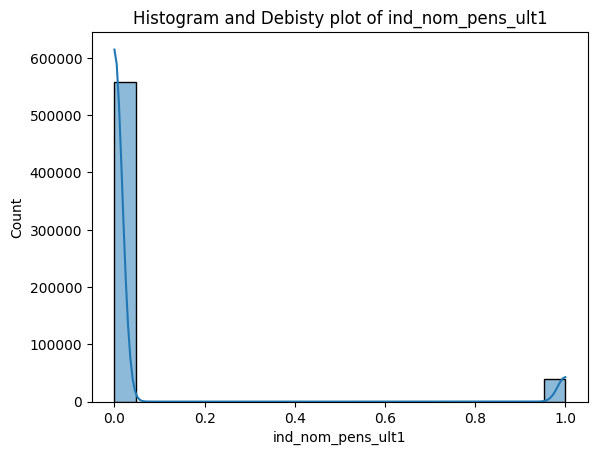

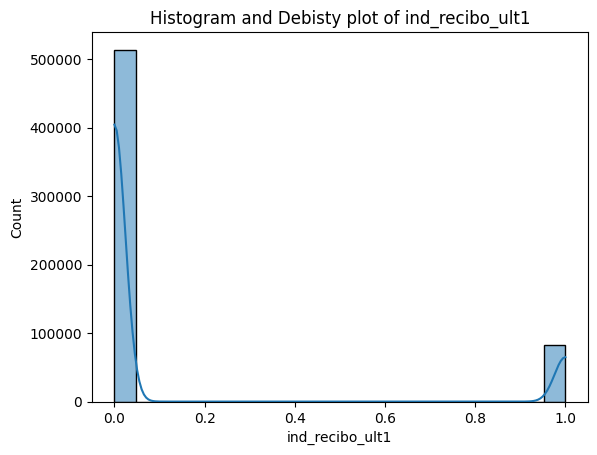

In [32]:
for col in rec.select_dtypes(include=['number']).columns:
    sns.histplot(rec[col], kde=True)
    plt.title(f"Histogram and Debisty plot of {col}")
    plt.show()

In [33]:
import numpy as np 
rec['renta'] = np.log(rec['renta'])

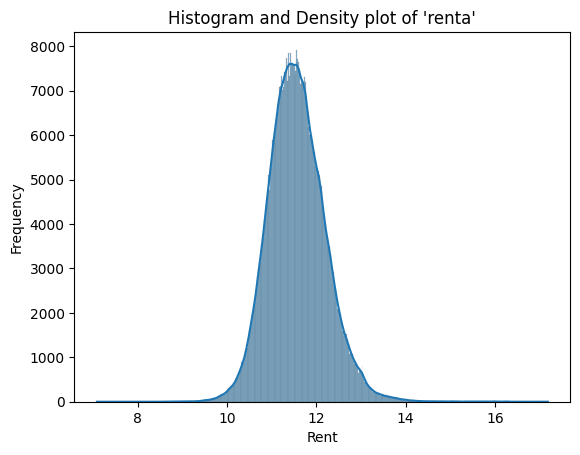

In [34]:
sns.histplot(rec['renta'], kde=True)
plt.title("Histogram and Density plot of 'renta'")
plt.xlabel("Rent")
plt.ylabel("Frequency")
plt.show()

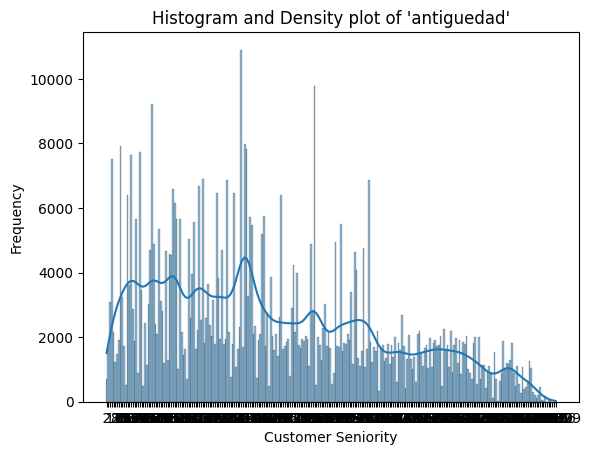

In [35]:
sns.histplot(rec['antiguedad'], kde=True)
plt.title("Histogram and Density plot of 'antiguedad'")
plt.xlabel("Customer Seniority")
plt.ylabel("Frequency")
plt.show()

In [36]:
duplicates=rec.duplicated().sum()
print("Number of Duplicate Records:", duplicates) 

Number of Duplicate Records: 0


In [37]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = rec['renta'].quantile(0.25)
Q3 = rec['renta'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for identifying outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = rec[(rec['renta'] < lower_bound) | (rec['renta'] > upper_bound)]

print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)

Lower bound: 9.908480195310329
Upper bound: 13.18942177921073


In [38]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = rec['age'].quantile(0.25)
Q3 = rec['age'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for identifying outliers
# Ensure that the lower bound doesn't go below 0
lower_bound = max(0, Q1 - 1.5 * IQR)
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = rec[(rec['age'] < lower_bound) | (rec['age'] > upper_bound)]

print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)


Lower bound: 0
Upper bound: 90.0


# **Data Visualization**

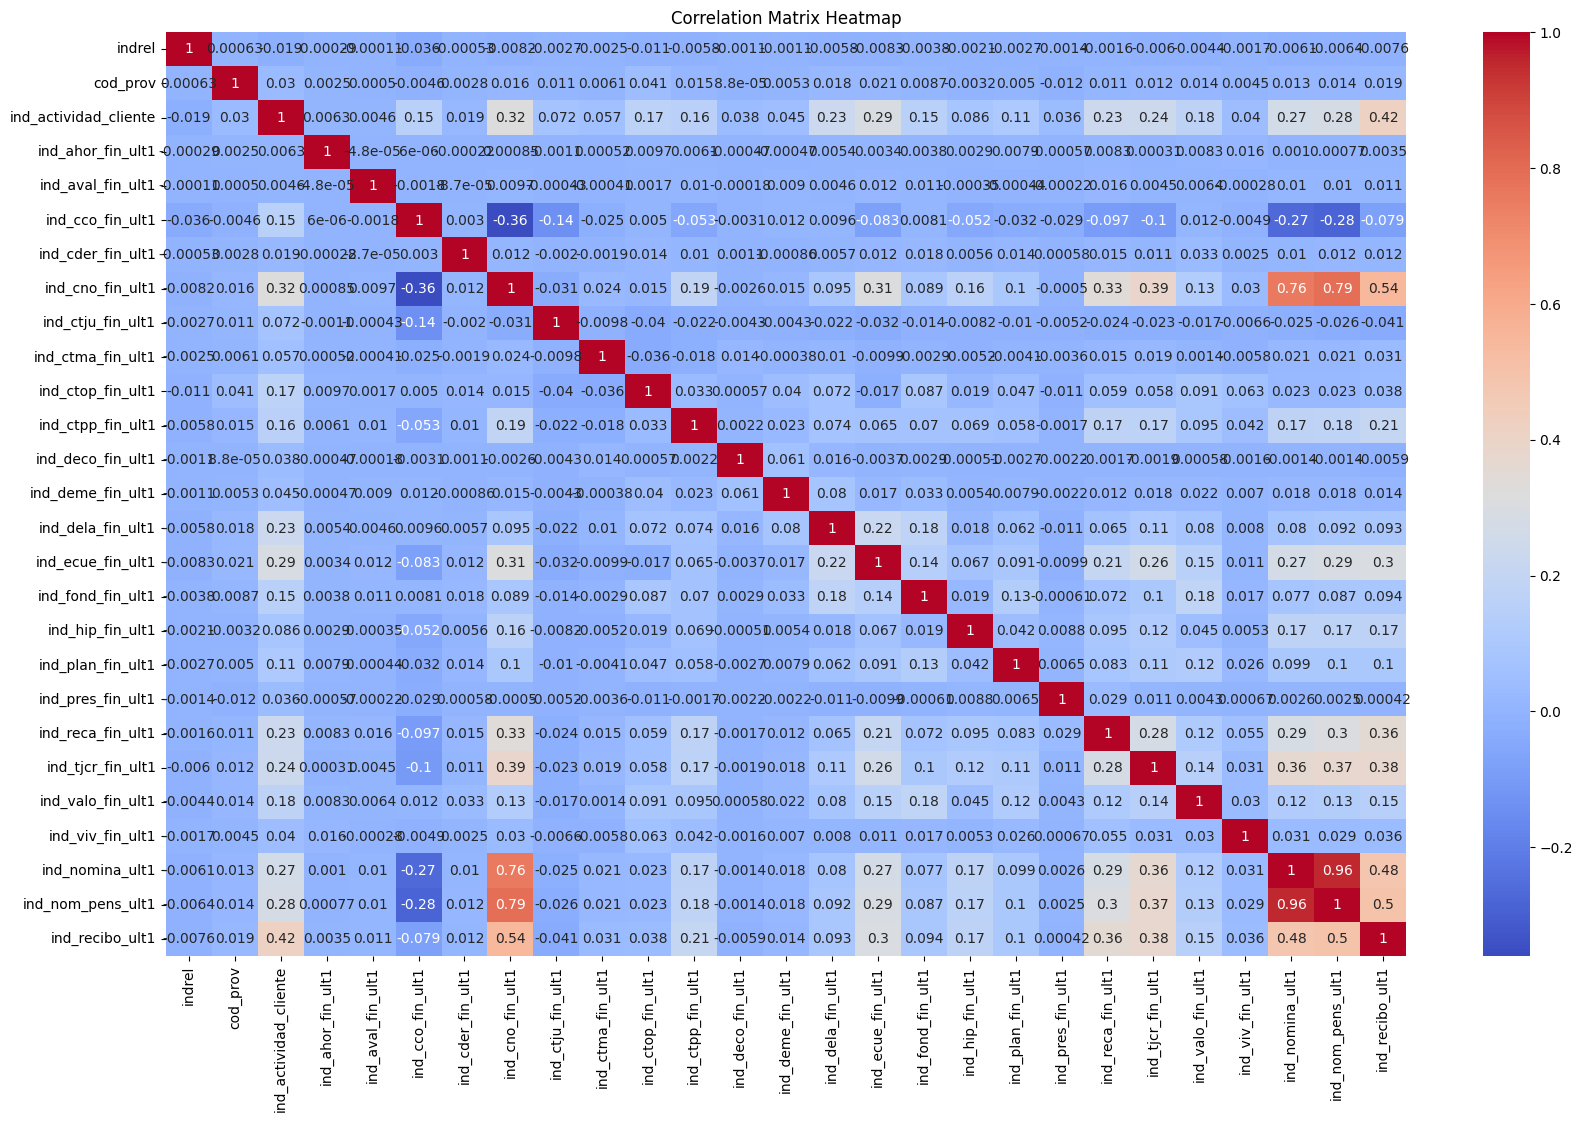

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

target_columns = ['ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1']
 
n_class = ['indrel', 'cod_prov', 'ind_actividad_cliente']
 
selected_columns = n_class + target_columns
 
subset_df = rec[selected_columns]
 
correlation_matrix = subset_df.corr()
 
plt.figure(figsize=(20,12))
 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


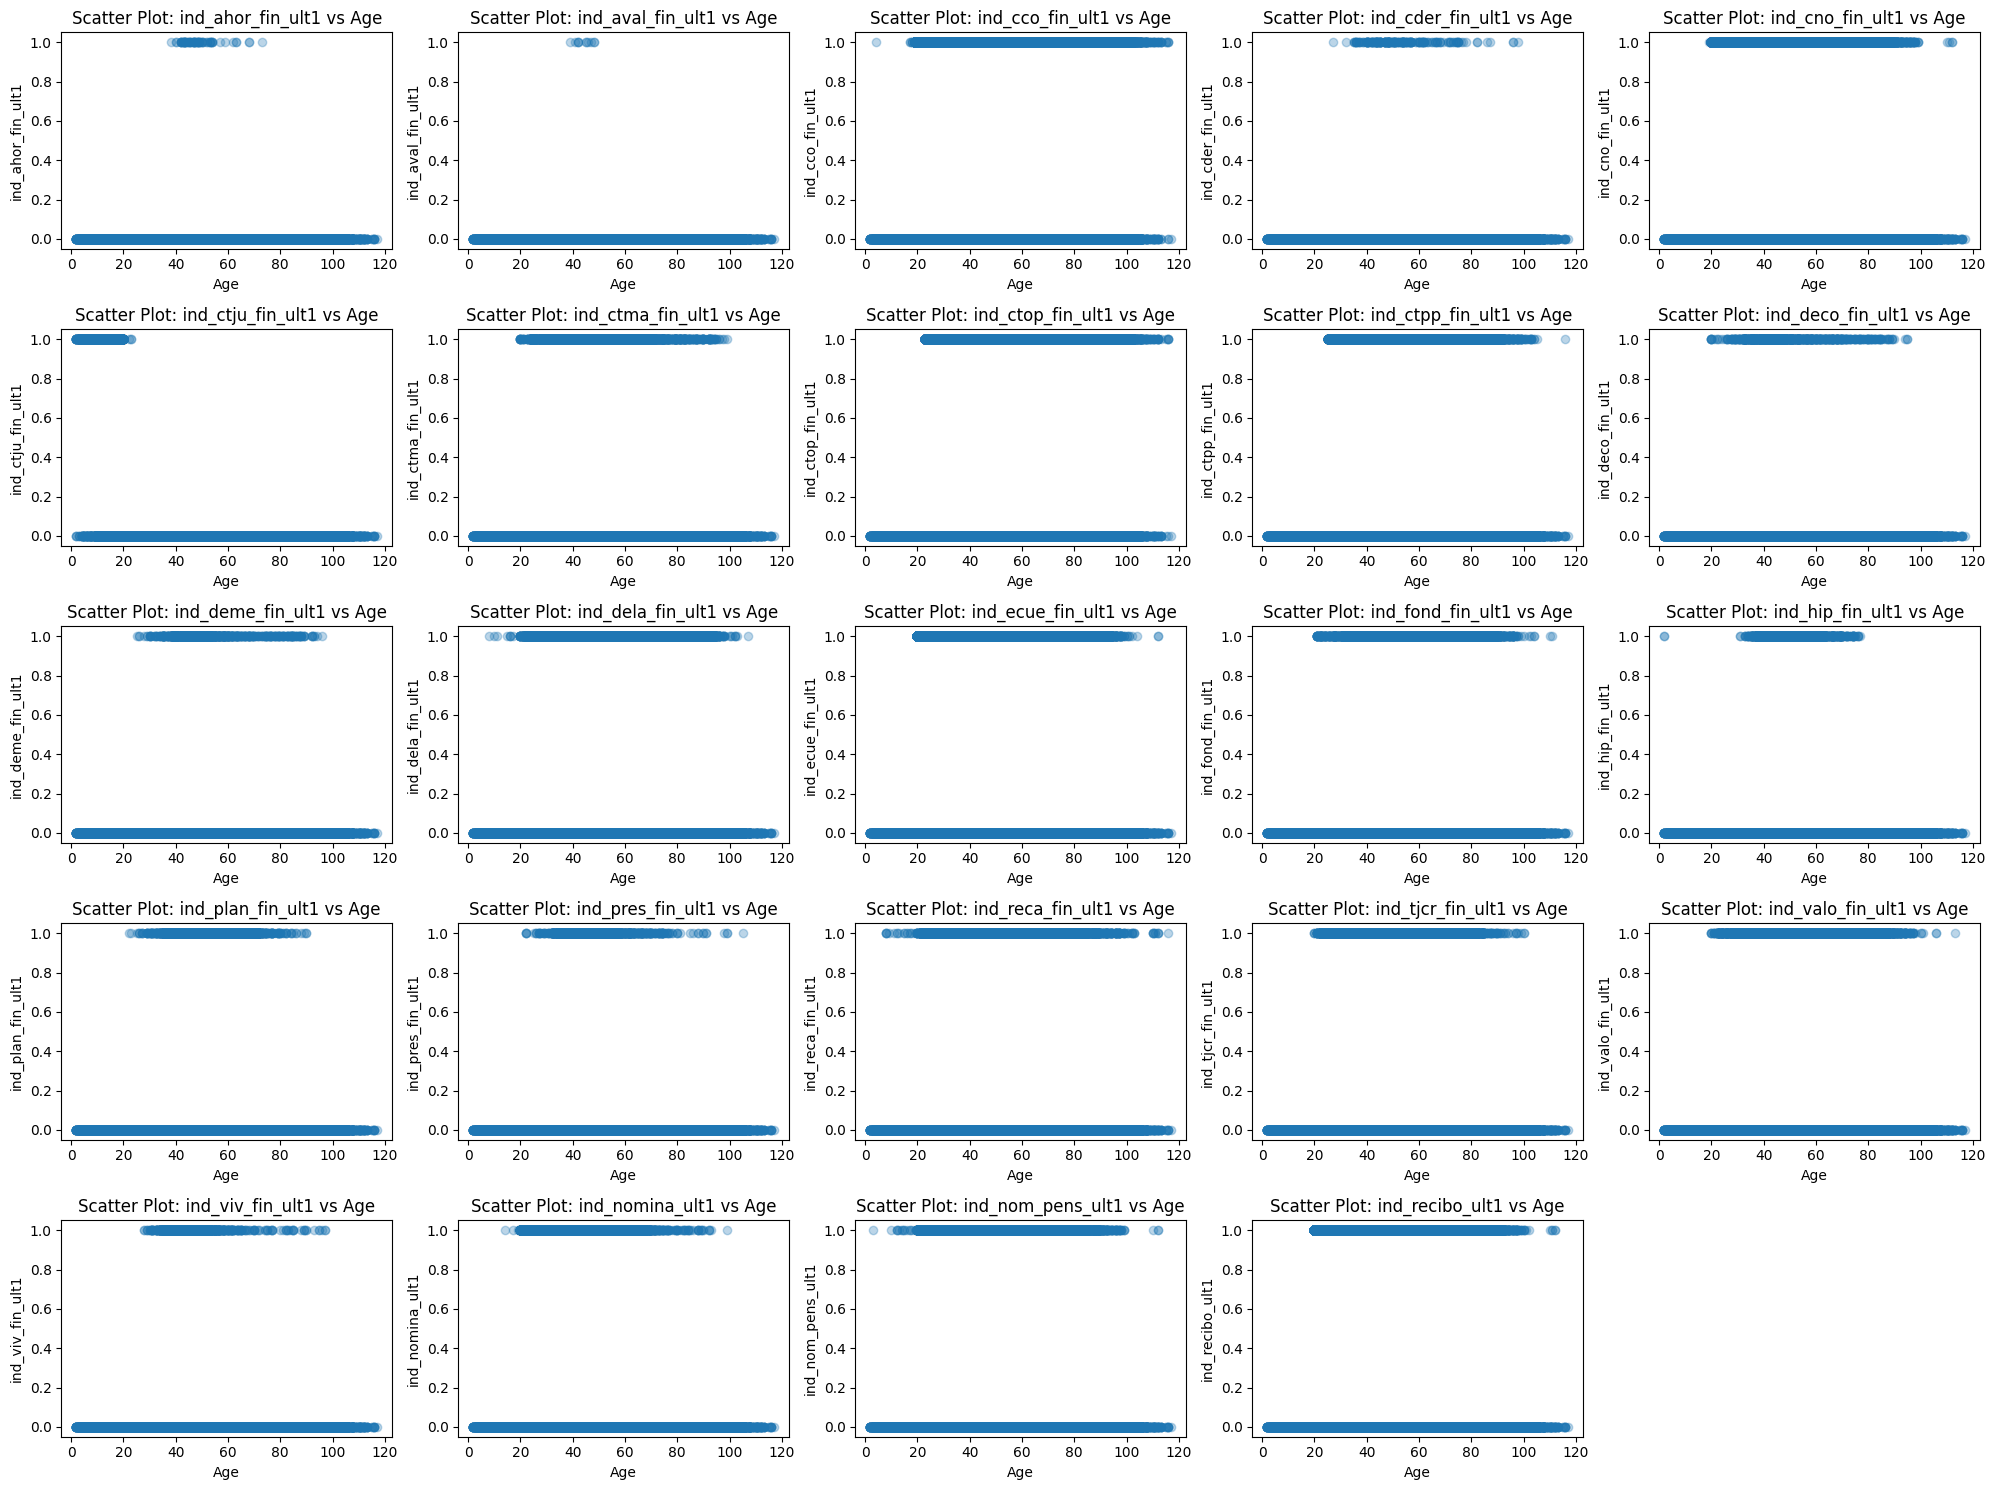

In [40]:
import matplotlib.pyplot as plt



# Define the target columns and the age column
target_columns = ['ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
                  'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
                  'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
                  'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
                  'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
                  'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
                  'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
                  'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1']
age_column = 'age'

# Plot scatter plots for each target variable
plt.figure(figsize=(20, 15))
for i, target_col in enumerate(target_columns, 1):
    plt.subplot(5, 5, i)
    plt.scatter(rec[age_column], rec[target_col], alpha=0.3)
    plt.title(f'Scatter Plot: {target_col} vs Age')
    plt.xlabel('Age')
    plt.ylabel(target_col)
plt.tight_layout()
plt.show()



In [41]:
rec.columns

Index(['fecha_dato', 'ncodpers', 'ind_empleado', 'pais_residencia', 'sexo',
       'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel', 'indrel_1mes',
       'tiprel_1mes', 'indresi', 'indext', 'canal_entrada', 'indfall',
       'tipodom', 'cod_prov', 'nomprov', 'ind_actividad_cliente', 'renta',
       'segmento', 'ind_ahor_fin_ult1', 'ind_aval_fin_ult1',
       'ind_cco_fin_ult1', 'ind_cder_fin_ult1', 'ind_cno_fin_ult1',
       'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1',
       'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1', 'ind_deme_fin_ult1',
       'ind_dela_fin_ult1', 'ind_ecue_fin_ult1', 'ind_fond_fin_ult1',
       'ind_hip_fin_ult1', 'ind_plan_fin_ult1', 'ind_pres_fin_ult1',
       'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1',
       'ind_viv_fin_ult1', 'ind_nomina_ult1', 'ind_nom_pens_ult1',
       'ind_recibo_ult1'],
      dtype='object')

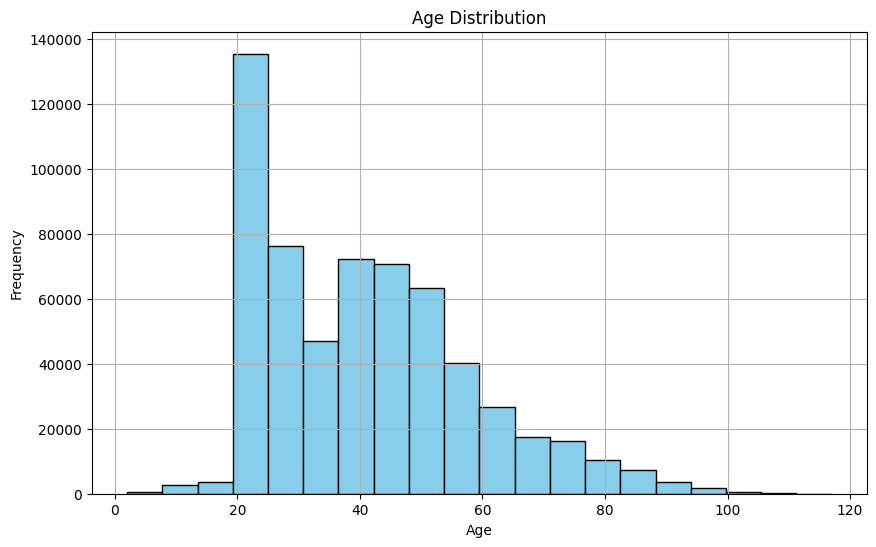

In [42]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.hist(rec['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


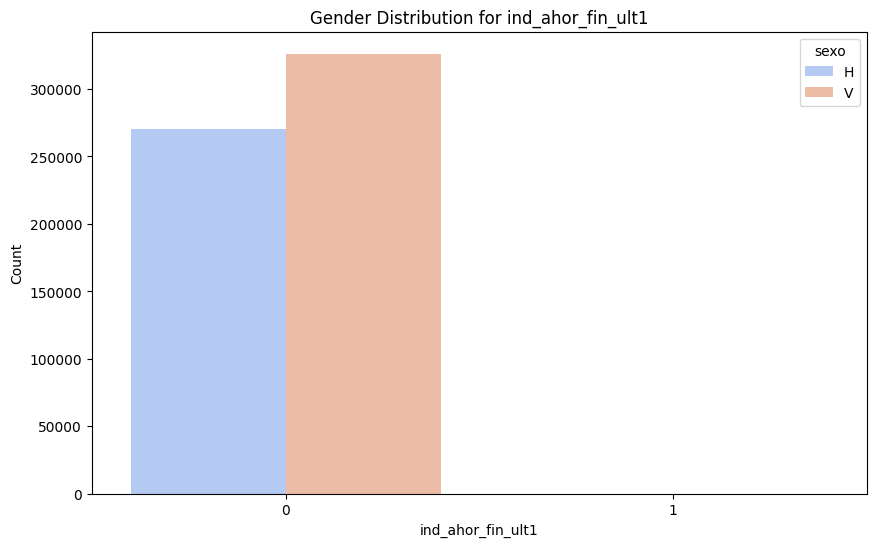

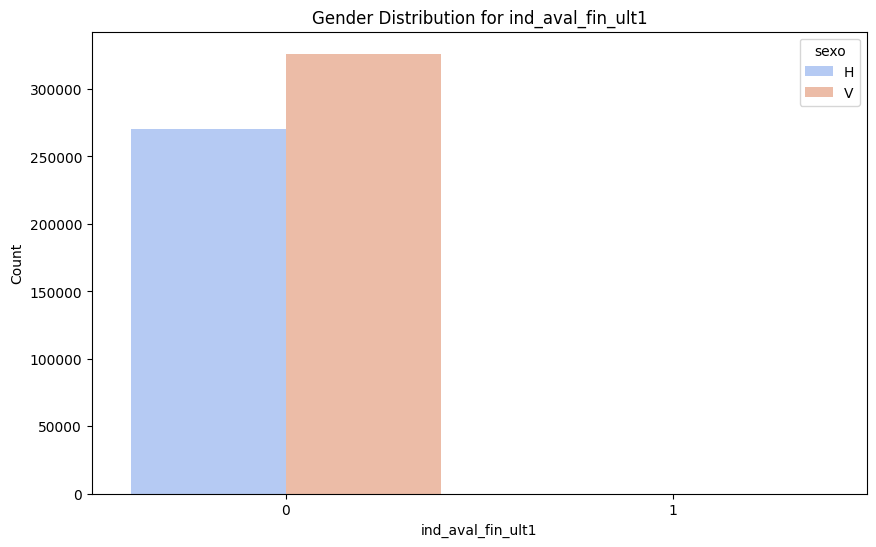

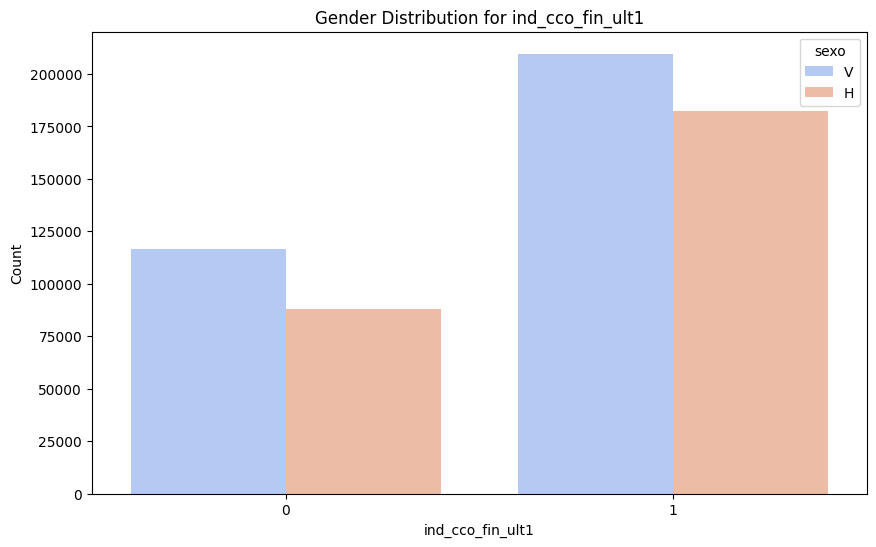

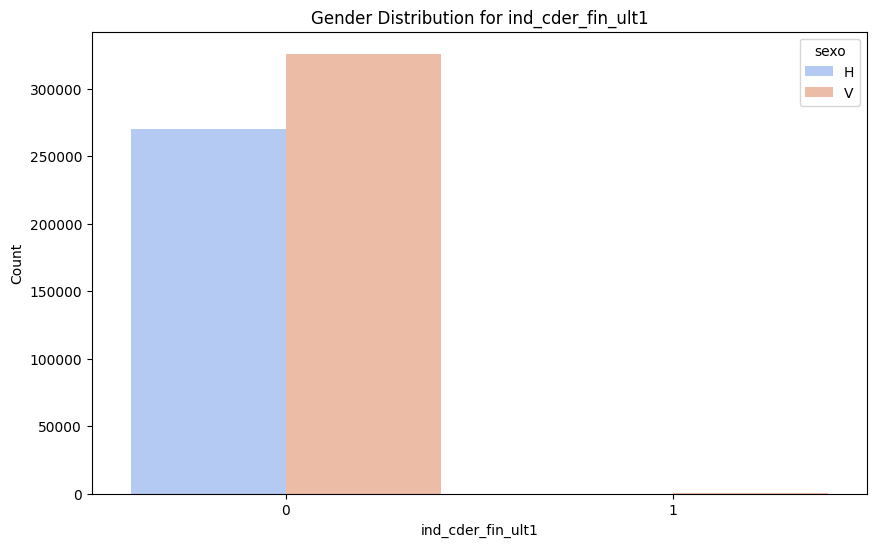

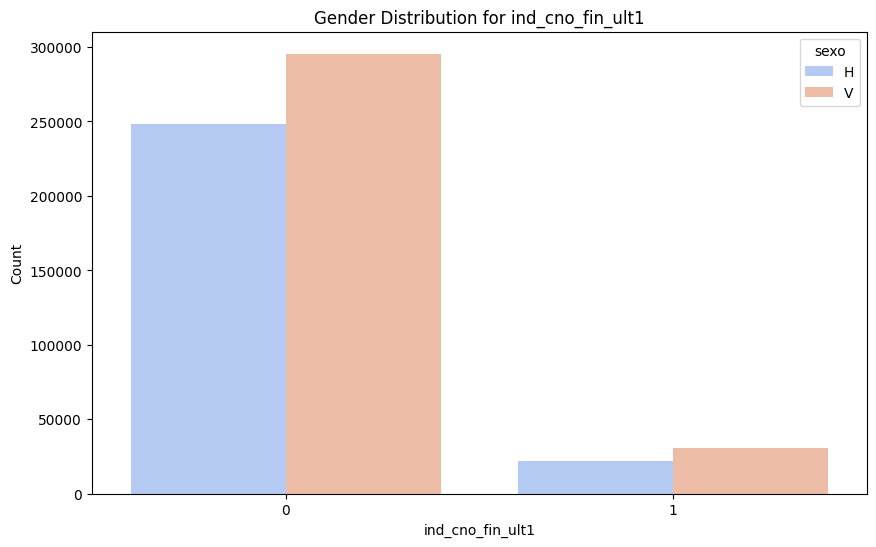

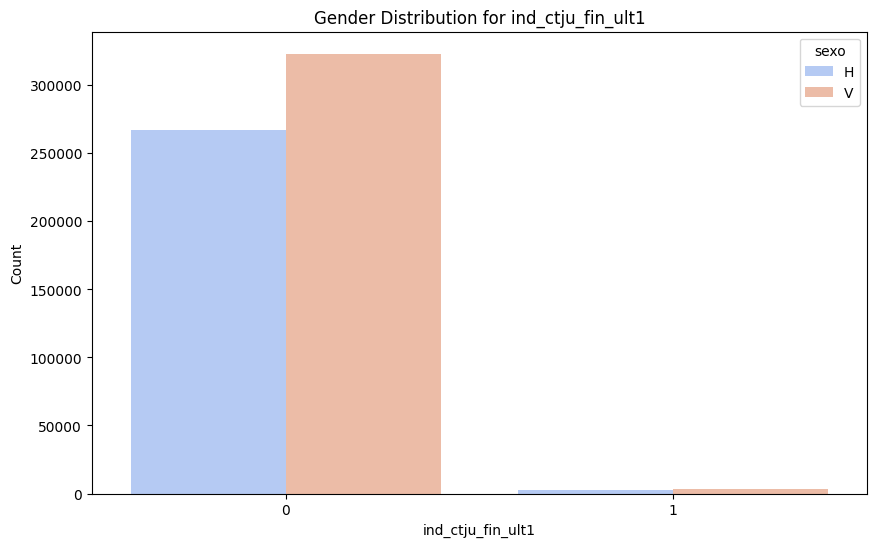

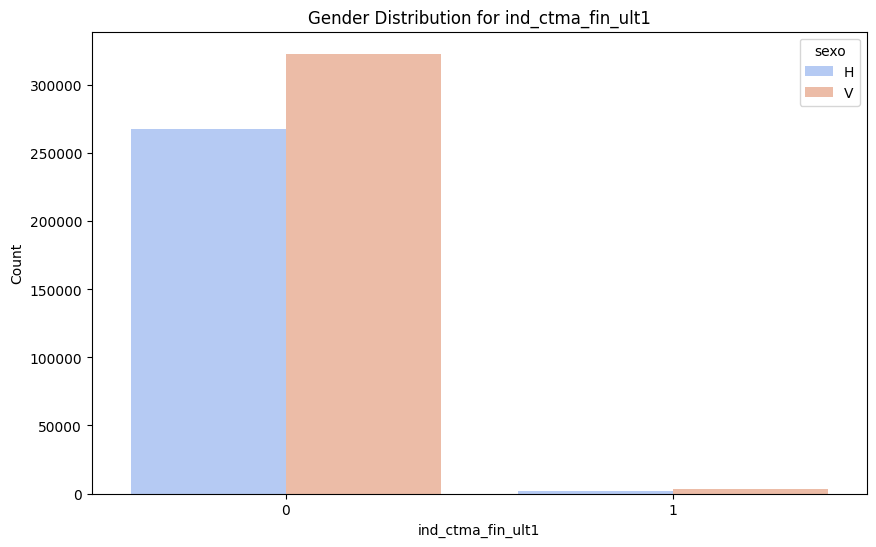

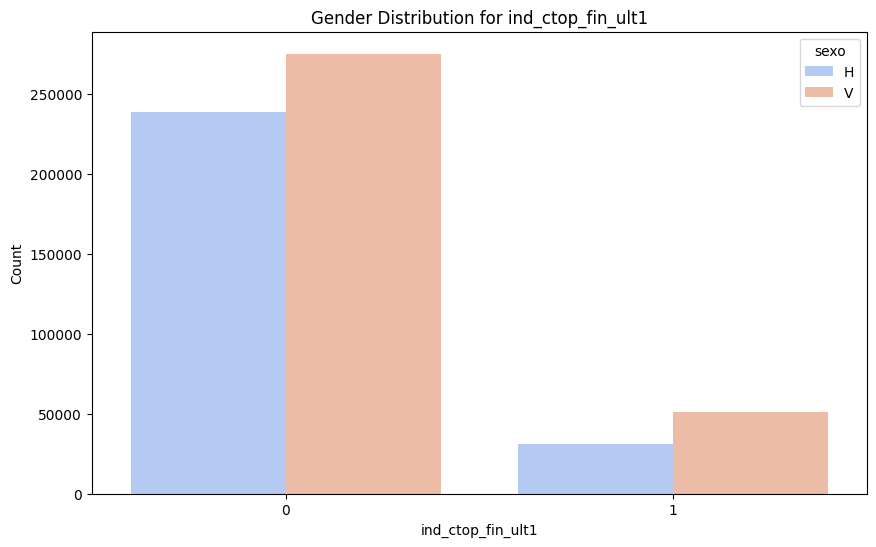

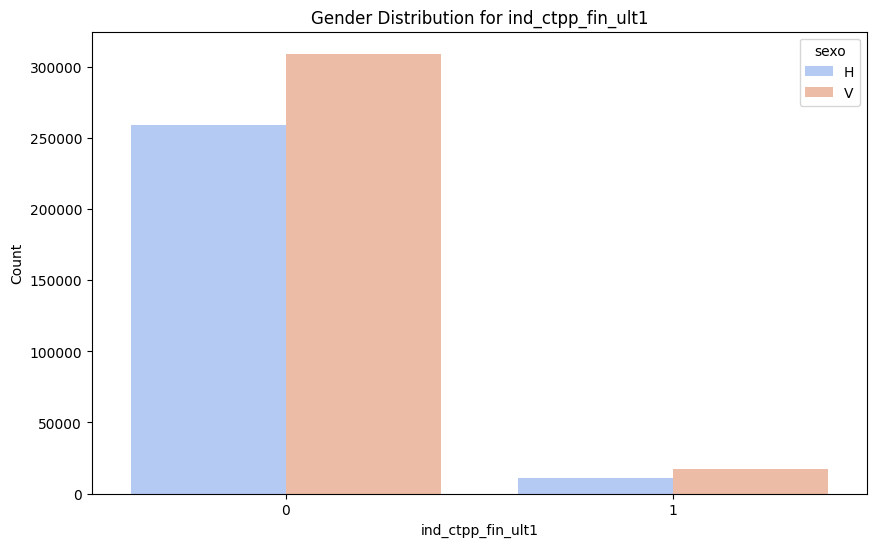

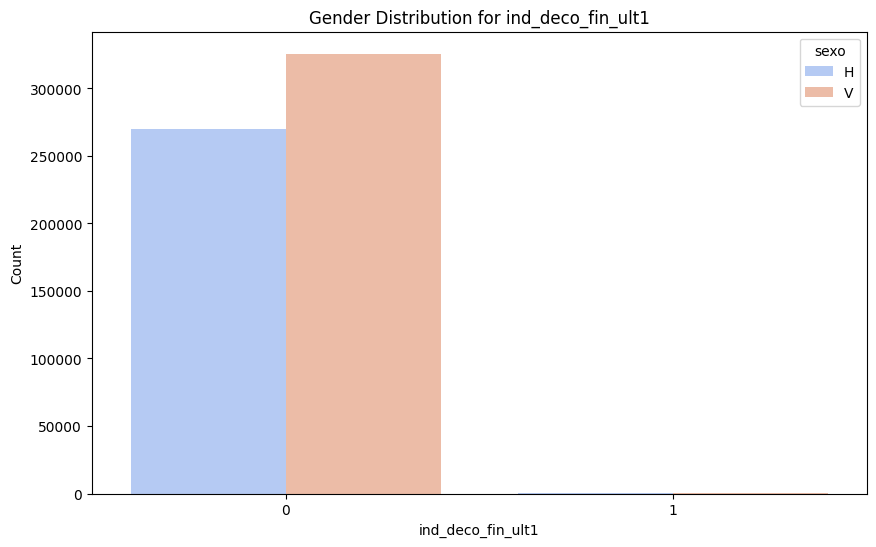

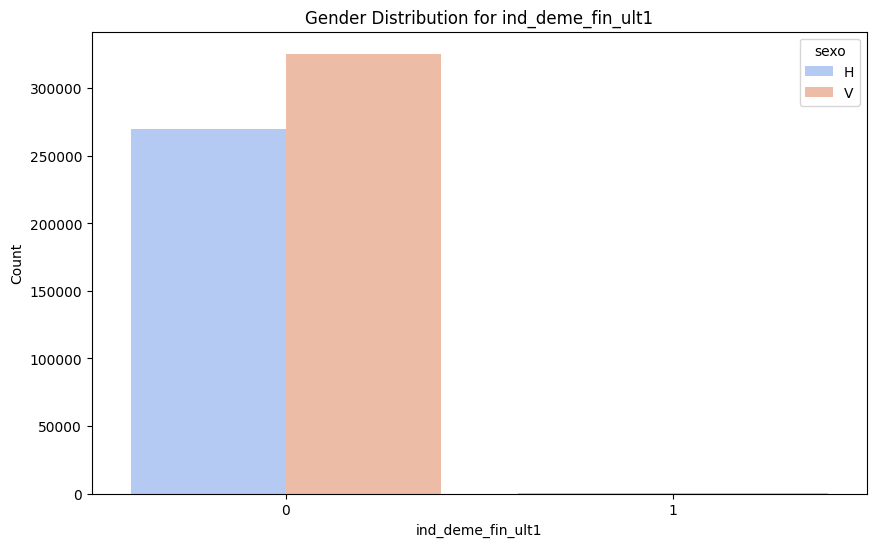

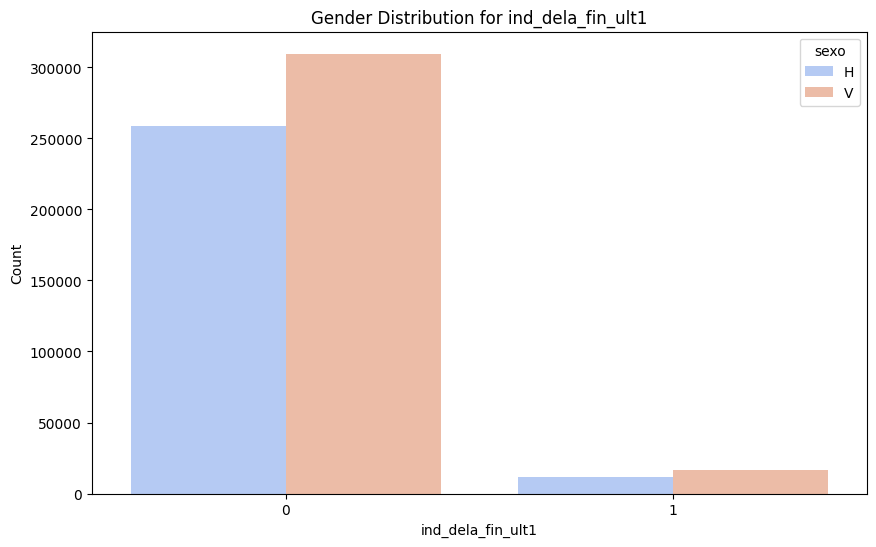

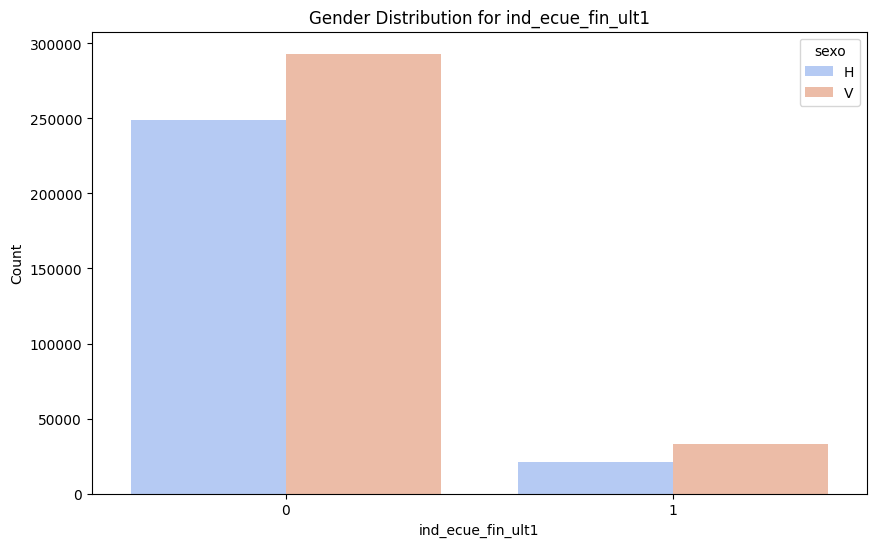

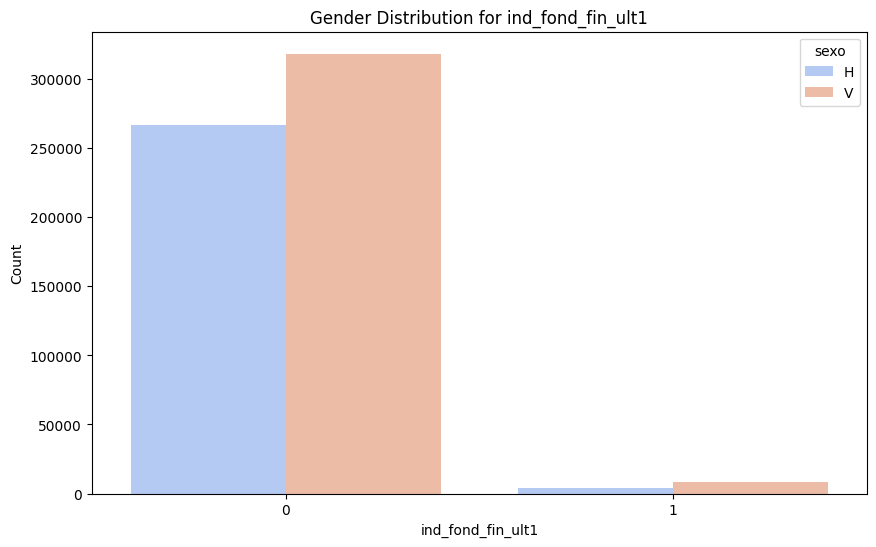

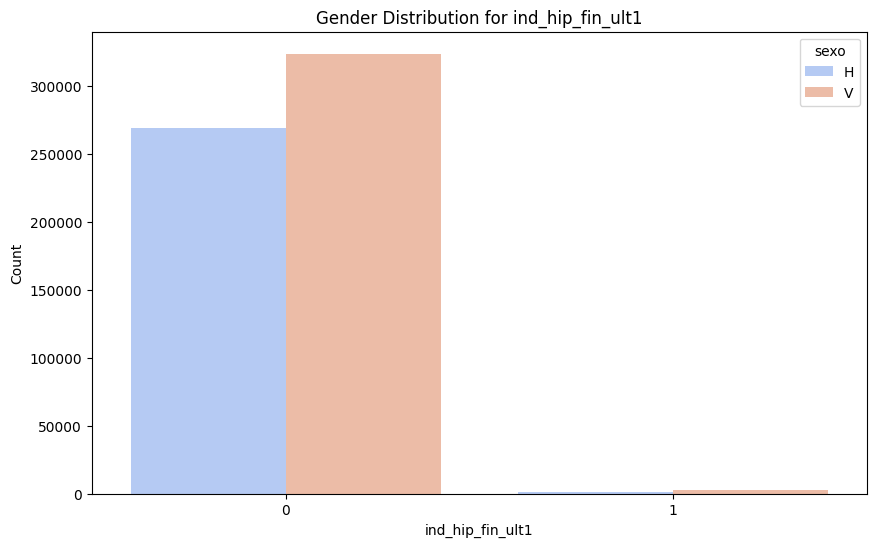

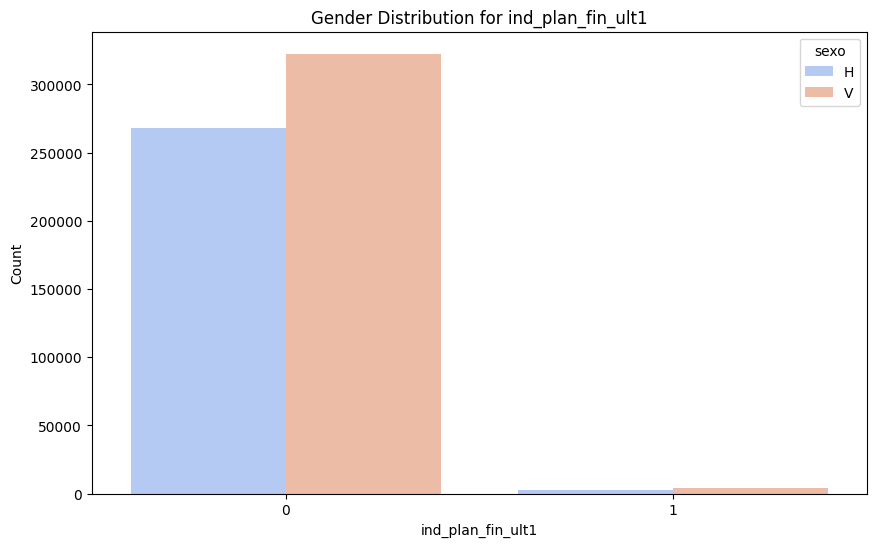

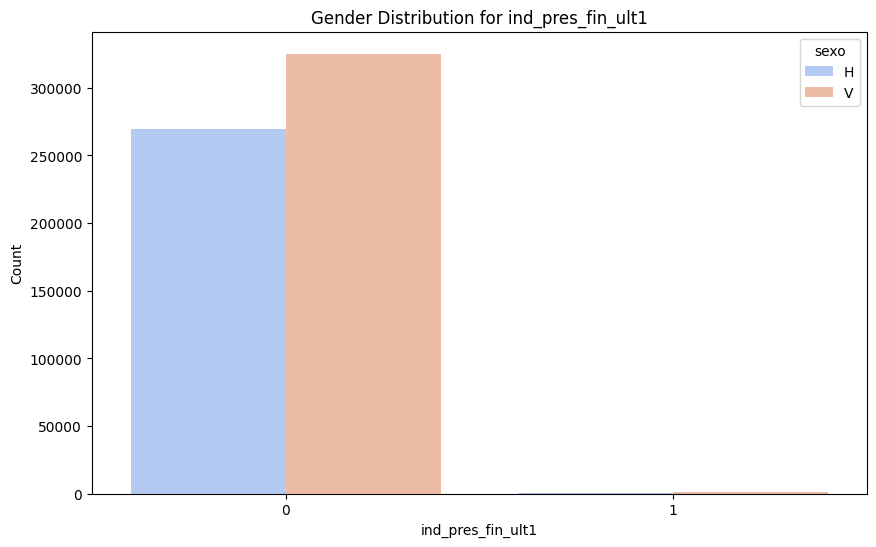

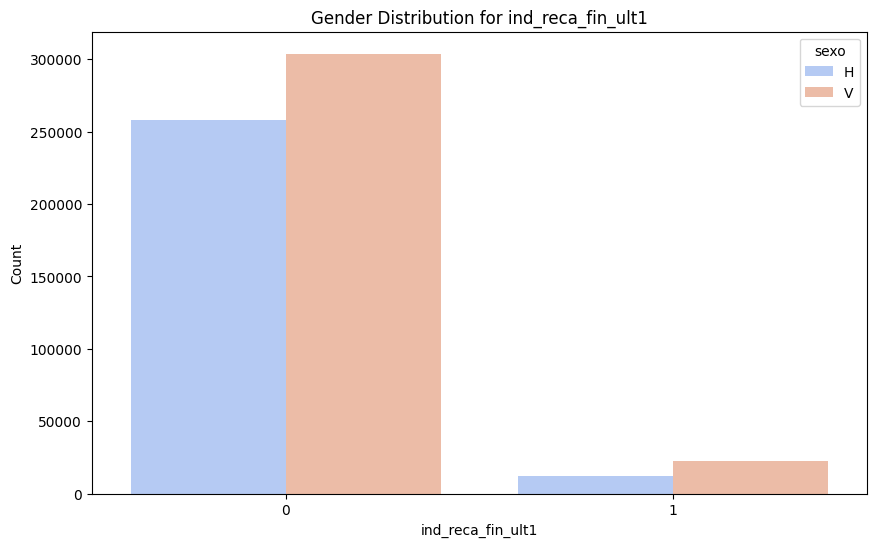

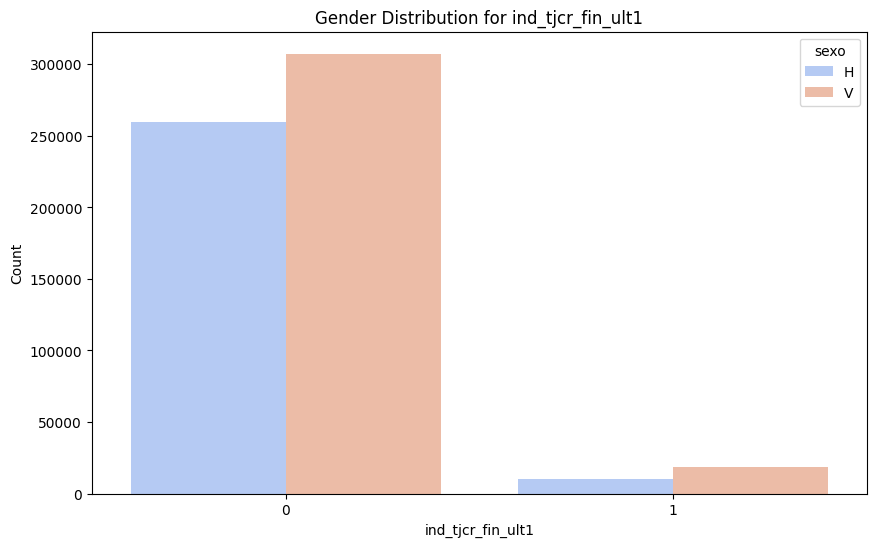

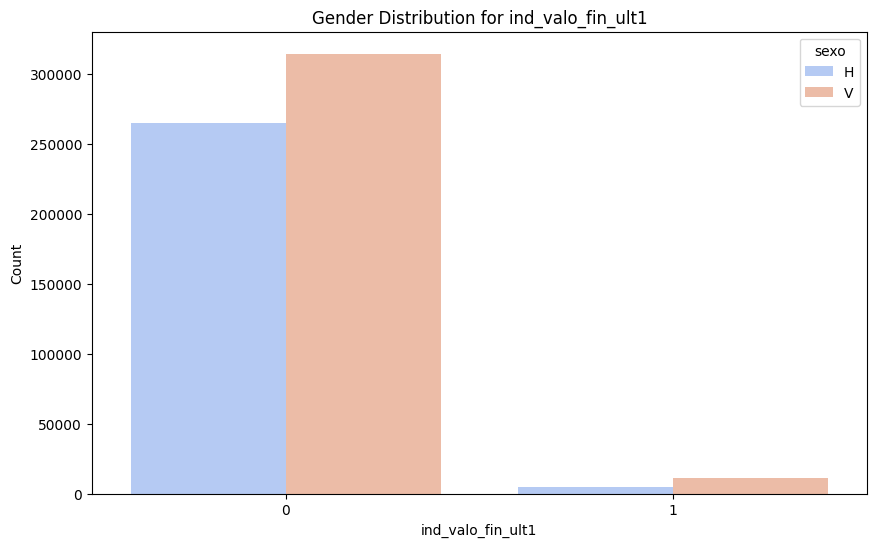

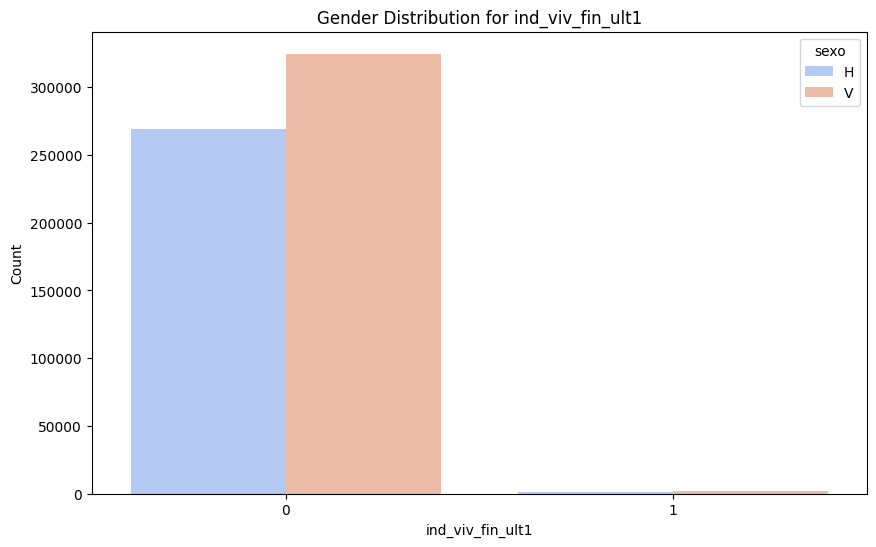

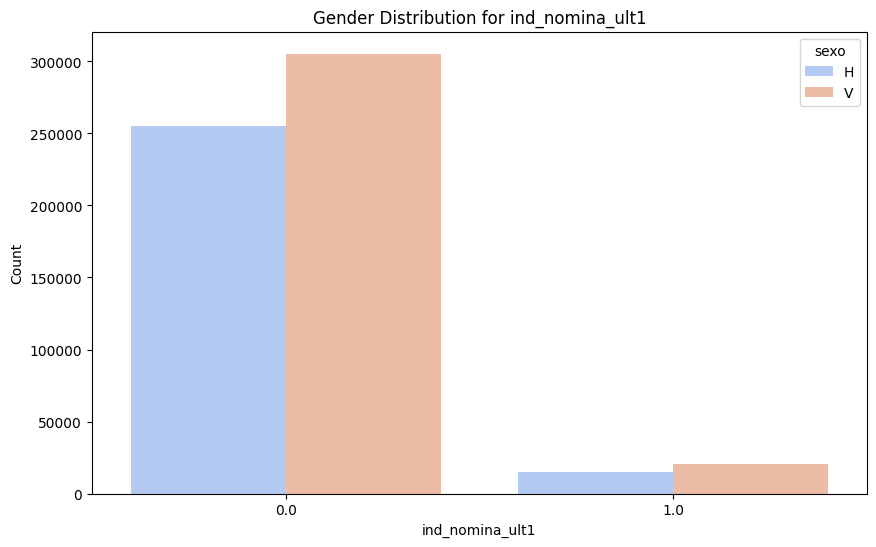

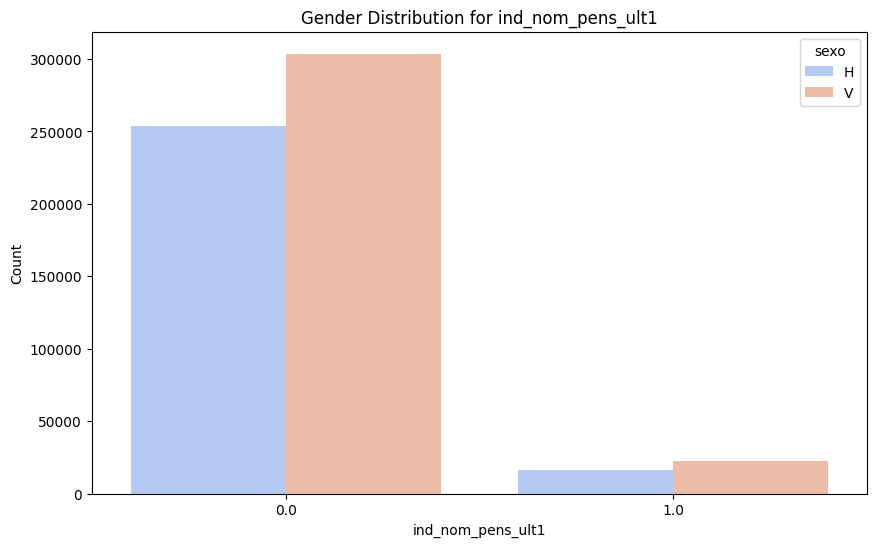

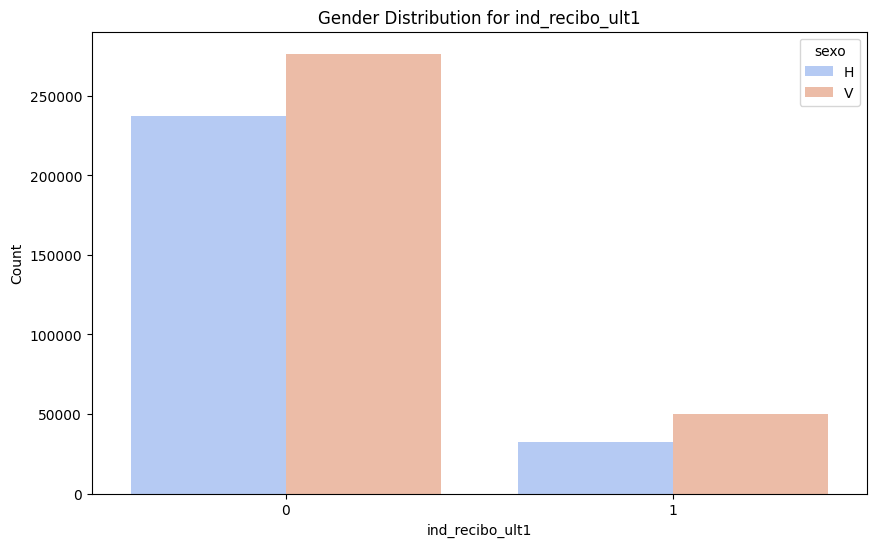

In [43]:

target_columns = ['ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
                  'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
                  'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
                  'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
                  'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
                  'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
                  'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
                  'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1']
gender_column = 'sexo'  
for target_col in target_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=target_col, hue=gender_column, data=rec, palette='coolwarm')
    plt.title(f'Gender Distribution for {target_col}')
    plt.xlabel(target_col)
    plt.ylabel('Count')
    plt.legend(title=gender_column)
    plt.show()


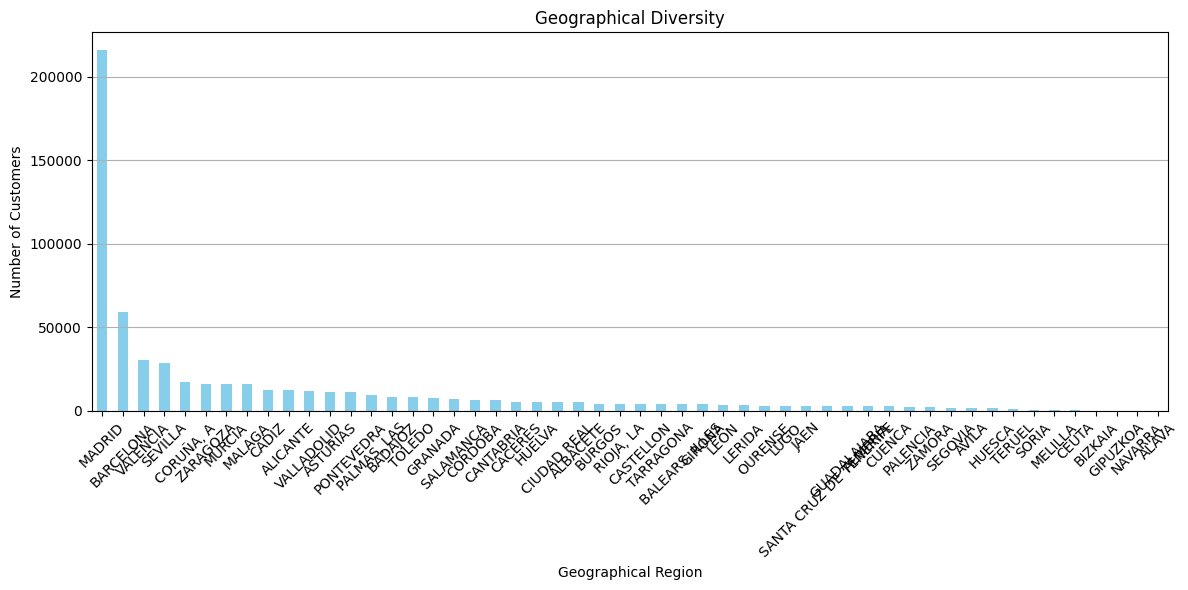

In [44]:


import matplotlib.pyplot as plt


region_counts = rec['nomprov'].value_counts()

# Plot a histogram
plt.figure(figsize=(12, 6))
region_counts.plot(kind='bar', color='skyblue')
plt.title('Geographical Diversity')
plt.xlabel('Geographical Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)  
plt.grid(axis='y')  
plt.tight_layout()
plt.show()



<Figure size 1200x600 with 0 Axes>

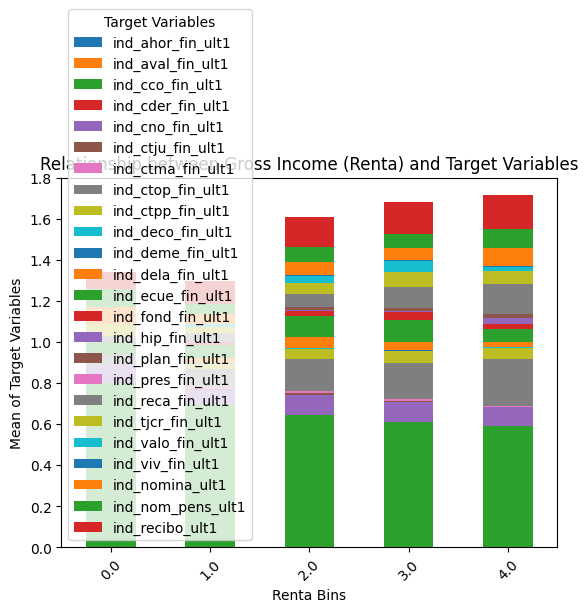

In [45]:
import numpy as np


num_bins = 5
bin_edges = np.linspace(rec['renta'].min(), rec['renta'].max(), num_bins + 1)


rec['renta_bin'] = pd.cut(rec['renta'], bins=bin_edges, labels=False)


target_means = rec.groupby('renta_bin')[target_columns].mean()


plt.figure(figsize=(12, 6))
target_means.plot(kind='bar', stacked=True)
plt.title('Relationship between Gross Income (Renta) and Target Variables')
plt.xlabel('Renta Bins')
plt.ylabel('Mean of Target Variables')
plt.xticks(rotation=45)
plt.legend(title='Target Variables')
plt.show()


<Figure size 1200x600 with 0 Axes>

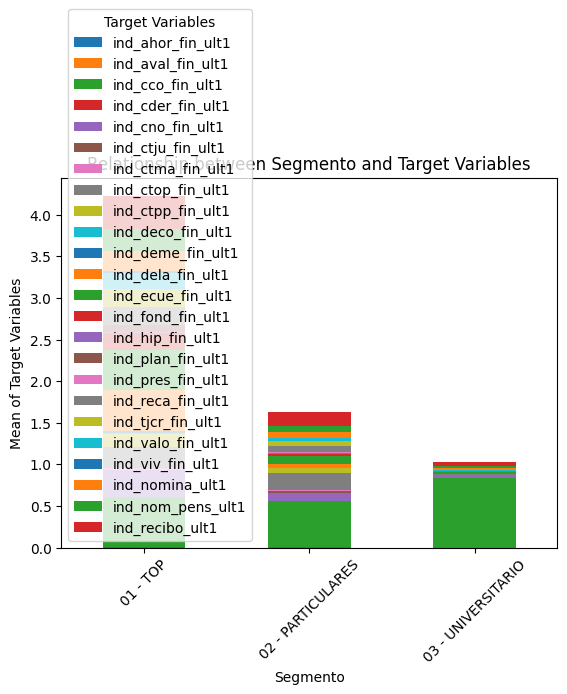

In [46]:

target_means_segmento = rec.groupby('segmento')[target_columns].mean()


plt.figure(figsize=(12, 6))
target_means_segmento.plot(kind='bar', stacked=True)
plt.title('Relationship between Segmento and Target Variables')
plt.xlabel('Segmento')
plt.ylabel('Mean of Target Variables')
plt.xticks(rotation=45)
plt.legend(title='Target Variables')
plt.show()


Based of the different graphs I believe it is best if I use Renta, geographic region, Gender, and age for the machine learning algorithm. 

# **Machine Learning**

In [47]:
rec['tiprel_1mes'].replace(to_replace=["I", "A", "P"], value=[0, 1, 0], inplace=True)


In [48]:
rec['sexo'].replace(to_replace=["H", "V"], value=[0, 1], inplace=True)


In [49]:
rec['sexo'].value_counts()

sexo
1    326265
0    270091
Name: count, dtype: int64

In [50]:
rec['tiprel_1mes'].value_counts()

tiprel_1mes
0    319809
1    276547
Name: count, dtype: int64

In [51]:
rec['segmento'].replace(to_replace=["02 - PARTICULARES", "03 - UNIVERSITARIO", "01 - TOP"], value=[2, 3, 1], inplace=True)


In [52]:
rec['segmento'].value_counts()

segmento
2    360090
3    209724
1     26542
Name: count, dtype: int64

In [66]:
print(rec.columns)

Index(['fecha_dato', 'ncodpers', 'ind_empleado', 'pais_residencia', 'sexo',
       'age', 'ind_nuevo', 'antiguedad', 'indrel', 'indrel_1mes',
       ...
       'day_22', 'day_23', 'day_24', 'day_25', 'day_26', 'day_27', 'day_28',
       'day_29', 'day_30', 'day_31'],
      dtype='object', length=111)


In [68]:
rec_X = rec[['sexo', 'age' , 'renta', 'tiprel_1mes', 'antiguedad', 'segmento', ]].copy()
rec_y = rec['ind_cco_fin_ult1'].copy()

In [69]:
new_column= ['sexo', 'age' , 'renta', 'tiprel_1mes', 'antiguedad', 'segmento']
rec_X.columns = new_column 
rec_X.head()

,sexo,age,renta,tiprel_1mes,antiguedad,segmento
16385,0,59.0,10.999119,0,220,2
16386,1,47.0,11.521425,1,86,2
16388,1,42.0,11.886345,0,166,2
16390,1,25.0,11.039008,0,36,3
16391,0,37.0,10.990090,1,1,2


In [70]:
rec_X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 596356 entries, 16385 to 983039
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   sexo         596356 non-null  int64  
 1   age          596356 non-null  float64
 2   renta        596356 non-null  float64
 3   tiprel_1mes  596356 non-null  int64  
 4   antiguedad   596356 non-null  object 
 5   segmento     596356 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 31.8+ MB


In [71]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(rec_X, rec_y, test_size=0.3, random_state=50)

In [73]:
log_model = LogisticRegression(solver='lbfgs', max_iter=3000)
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=3000)

In [74]:
y_pred_train = log_model.predict(X_train)

In [75]:
from sklearn import metrics

cnf_matrix_train = metrics.confusion_matrix(y_train, y_pred_train)
cnf_matrix_train

array([[ 50056,  92888],
       [ 43003, 231502]])

In [76]:
y_pred_test = log_model.predict(X_test)
cnf_matrix_test = metrics.confusion_matrix(y_test, y_pred_test)
cnf_matrix_test

array([[21512, 39928],
       [18588, 98879]])